## Исследование источников траффика и определение перспективных когорт клиентов для Яндекс.Афиши 

Исследование проводится для отдела маркетинговой аналитики Яндекс.Афиши. Необходимо проанализировать, какие источники трафика наименее выгодны и дать рекомендации по распределению маркетингового бюджета. 

Анализ проводится для периода с июня 2017 по конец мая 2018 года.

Представлены следующие данные:
- лог сервера с данными о посещениях сайта Яндекс.Афиши;
- выгрузка всех заказов за этот период;
- статистика рекламных расходов.

В ходе работы необходимо изучить как клиенты пользуются сервисом, определить, сколько денег приносит компании каждый клиент и в каком случае расходы на привлечение клиента окупаются.

## Изучение данных из файла

In [1]:
#Загрузим библиотеки, которые понадобятся

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy import stats as st
from scipy.stats import norm
from scipy.stats import mode
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Прочитаем файл visits_log и сохраним его
try:
    visits = pd.read_csv('/datasets/visits_log.csv')
except:
    visits = pd.read_csv('visits_log.csv')
display(visits.head(5))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Структура visits_log.csv:

- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

In [3]:
# Общая информация
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Данные в столбцах End Ts и Start Ts необходимо преобразовать к типу Datetime.

In [4]:
# Прочитаем файл  orders_log.csv и сохраним его
try:
    orders = pd.read_csv('/datasets/orders_log.csv')
except:
    orders = pd.read_csv('orders_log.csv')
display(orders.head(5))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Структура orders_log.csv:
    
- Uid— уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

In [5]:
# Общая информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Данные в столбце Buy Ts необходимо преобразовать к типу Datetime. 

In [6]:
# Прочитаем файл  costs.csv и сохраним его
try:
    costs = pd.read_csv('/datasets/costs.csv')
except:
    costs = pd.read_csv('costs.csv')
display(costs.head(5))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Структура costs.csv:
    
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

In [7]:
# Общая информация
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Данные в столбце dt необходимо преобразовать к типу Datetime.

In [8]:
# Проверка на нулевые значения
display(costs.isnull().sum())
display(orders.isnull().sum())
display(visits.isnull().sum())

source_id    0
dt           0
costs        0
dtype: int64

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

пропущенных данных не обнаружено.

#### Вывод

Тип данных в столбцах с датами нужно преобразовать к типу datetime. Названия столбцов привести к нижнему регистру.
Также необходимо будет проверить данные на дубликаты. 

## Предобработка данных

In [9]:
# Приводим названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [10]:
#Проверка на дубликаты
print('Количество дубликатов visits -', visits.duplicated().sum())
print('Количество дубликатов orders -', orders.duplicated().sum())
print('Количество дубликатов costs -', costs.duplicated().sum())

Количество дубликатов visits - 0
Количество дубликатов orders - 0
Количество дубликатов costs - 0


In [11]:
# Переименуем названия столбцов visits
visits.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis = 'columns', inplace = True)
visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
# Преобразуем столбцы с датами в формат datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [13]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [14]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Наибольшее количество данных в таблице visits представлено по переходам с desktop (около 73%). 
Источников с source_id 6 и 7 незначительное количество для анализа, их можно удалить.

In [15]:
visits = visits.drop(visits[visits['source_id'] == 6].index)
visits = visits.drop(visits[visits['source_id'] == 7].index)
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
Name: source_id, dtype: int64

Создадим столбец с длительностью посещения сайта. Не будем учитывать в анализе посещения продолжительностью 0 секунд, таких данных примерно 10%, что довольно много, стоит разобраться в причине их появления.

In [16]:
visits['duration_sec'] = visits['end_ts'] - visits['start_ts']
print('Всего количество строк -', visits.shape[0])

# Переведем длительность посещения сайта в секунды 
visits['duration_sec'] = visits['duration_sec'] / np.timedelta64(1, 's')
visits['duration_sec'] = visits['duration_sec'].round().astype('int')
visit_0 = visits[visits['duration_sec'] == 0]
print('Всего количество строк с длительностью посещения = 0 -', visit_0.shape[0])

Всего количество строк - 359358
Всего количество строк с длительностью посещения = 0 - 35792


In [17]:
# Показатель отказов: количество визитов с длительностью 0 (отказ) / общее количество визитов
print('Показатель отказов - {:.1%}'.format(visit_0.shape[0]/visits.shape[0]))

Показатель отказов - 10.0%


Посещения длительностью 0 секунд, скорее всего, отображают сеансы, в которых пользователь посмотрел только одну страницу. Поскольку у нас не одностраничный сайт, то высокий показатель отказа (10%) говорит о том, что пользователи не заинтересовались переходом на другие страницы и покупками. Посмотрим по каким источникам перехода больше всего отказов. 

In [18]:
# Сгруппируем по каналам пользователей с 0 посещениями
visit_0_group = visit_0.groupby('source_id')['uid'].count().reset_index().sort_values(by='uid', ascending = False)
visit_0_group['%uid'] = visit_0_group['uid']/visit_0_group['uid'].sum()
visit_0_group.style.format({('%uid'):'{:.2%}'})

,source_id,uid,%uid
3,4,10898,30.45%
2,3,9025,25.22%
4,5,7385,20.63%
1,2,4158,11.62%
0,1,1975,5.52%
5,9,1297,3.62%
6,10,1054,2.94%


In [19]:
# Количество посетителей по источникам
visit_group = visits.groupby('source_id')['uid'].nunique().reset_index()
visit_group = visit_group.sort_values('uid', ascending = False)
visit_group['%buyers'] = visit_group['uid']/visit_group['uid'].sum()
visit_group.style.format({('%buyers'):'{:.2%}'})

,source_id,uid,%buyers
3,4,83525,30.06%
2,3,74756,26.91%
4,5,56974,20.51%
1,2,26245,9.45%
0,1,18999,6.84%
5,9,9264,3.33%
6,10,8067,2.90%


Больше всего отказов по источнику посещения 4, затем идет источник 3. Но количество отказов пропорционально количеству уникальных посетителей по источникам, поэтому, вероятно, дело не в маркетинговой стратегии для конкретного канала.
В целом следует проверить, нет ли технических ошибок. Также рекомендуется проанализировать качество сайта: UX-UI дизайн.


In [20]:
# Переименуем названия столбцов orders
orders.set_axis(['buy_ts', 'revenue', 'uid'], axis = 'columns', inplace = True)

In [21]:
# Преобразуем столбец с датами в формат datetime 
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [22]:
# Удалим значения c revenue = 0
print('Всего количество строк -', orders.shape[0])
orders=orders.query('revenue > 0')
print('Всего количество строк c выручкой > 0 -', orders.shape[0])

Всего количество строк - 50415
Всего количество строк c выручкой > 0 - 50364


51 строка с нулевой выручкой, почему появились нулевые данные, нужно разобраться отдельно.

In [23]:
# Преобразуем столбец с датами в формат datetime 
costs['dt'] = pd.to_datetime(costs['dt'])
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [24]:
costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

Количество источников данных в таблице costs и visits совпадает, их можно объединять по этому столбцу.

#### Вывод

Данные обработаны, названия столбцов приведены к нижнему регистру, данные проверены на дубликаты, преобразованы к типу, подходящему для исследований. Нулевые значения в данных удалены, данные пригодны для дальнейшего анализа.

## Расчет метрик 

Рассчитаем метрики трёх видов: продуктовые, метрики электронной коммерции, маркетинговые.

### Продуктовые метрики

Рассчитаем DAU, WAU и MAU (количество уникальных пользователей в день, неделю и месяц соответственно). 
Вычислим средние значения этих метрик за весь период и отобразим изменения метрик во времени на графиках.

In [25]:
# Чтобы посчитать дневное, недельное и месячное использование, выделим в отдельные столбцы таблицы visits 
# год, месяц, неделю и день, а также полную дату.

visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_day']  = visits['start_ts'].dt.day
visits['session_date'] = visits['start_ts'].dt.date
visits.head(3)

,device,end_ts,source_id,start_ts,uid,duration_sec,session_year,session_month,session_week,session_day,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,2017-07-01,2017-06-29,1,2017-07-01


In [26]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее за весь период
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('В среднем, количество уникальных пользователей в день (DAU) -', int(dau))
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('В среднем, количество уникальных пользователей в неделю (WAU) -', int(wau))
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('В среднем, количество уникальных пользователей в месяц (MAU) -', int(mau))

В среднем, количество уникальных пользователей в день (DAU) - 907
В среднем, количество уникальных пользователей в неделю (WAU) - 5621
В среднем, количество уникальных пользователей в месяц (MAU) - 23225


In [27]:
# Составим сводную таблицы с количеством уникальных пользователей по дням
dau_change= visits.pivot_table(index='session_date', values ='uid', aggfunc='nunique')

In [28]:
#Функция для графиков
#Напишем функцию, строящую графики типа plot
#датасет, название, ось х, ось у
    
def print_plot(x_data, title="", xl="", yl="" ):    
    x_data.plot(linewidth=3, alpha=0.7, figsize=(15,10), grid = True)
    ax = plt.axes() 
    ax.set_title(title) #подписали заголовок
    plt.xlabel(xl) #подписали ось х
    plt.ylabel(yl) #подписали ось y
    plt.legend()
    plt.show()    

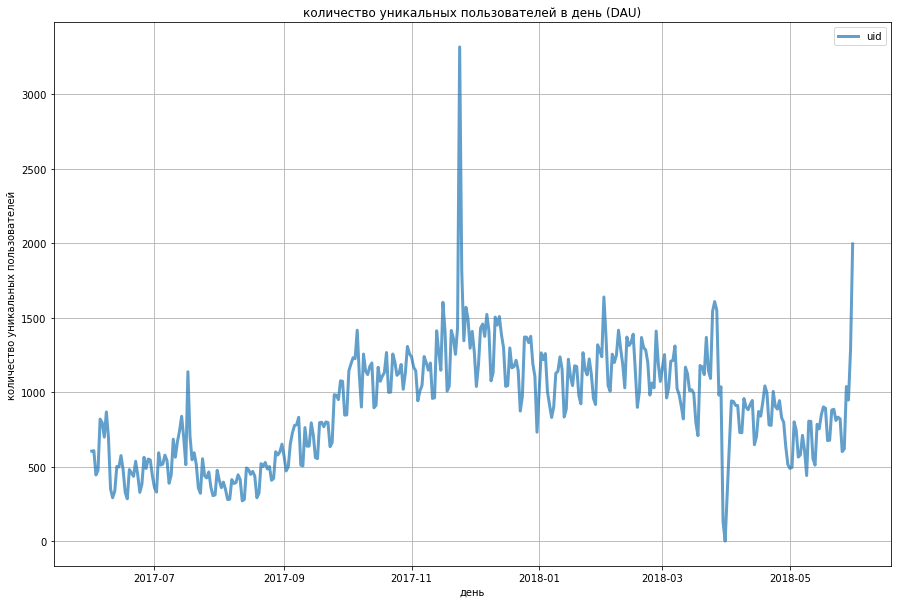

In [29]:
#Построим график
#датасет, название, ось х, ось у
print_plot(dau_change, 'количество уникальных пользователей в день (DAU)', 'день', 'количество уникальных пользователей')

На графики видны резкие подъемы и спады, определим в какие даты они происходили:

In [30]:
dau_change[dau_change['uid'] == dau_change['uid'].max()]

,uid
session_date,
2017-11-24,3319


In [31]:
dau_change[dau_change['uid'] == dau_change['uid'].min()]

,uid
session_date,
2018-03-31,1


Какое-то событие вызвало 24 ноября 2017 года резкий приток пользователей. Новых пользователей было 3319, в то время как среднее значение - 907. 31 марта 2018 всего один пользователь посетил сайт, вероятно, были технические неполадки. Поскольку есть такие пики, посмотрим не средние, а медианные значения уникальных пользователей в день, неделю и месяц.

In [32]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее за весь период
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в день (DAU) -', int(dau))
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в неделю (WAU) -', int(wau))
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в месяц (MAU) -', int(mau))

Медианное кол-во уникальных пользователей в день (DAU) - 921
Медианное кол-во уникальных пользователей в неделю (WAU) - 5599
Медианное кол-во уникальных пользователей в месяц (MAU) - 24239


В целом, значения близки к средним, можно оставить среднее, как требуется в техническом задании.

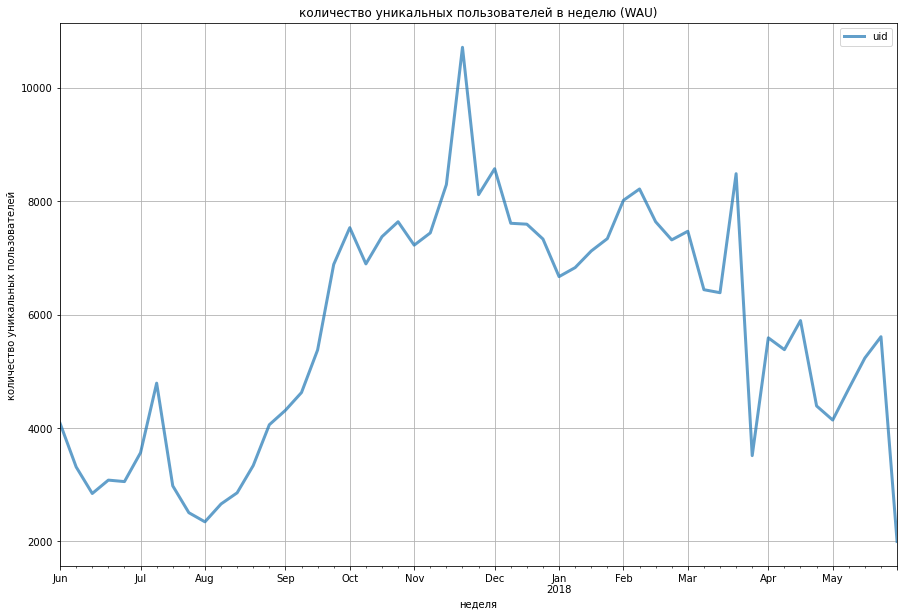

In [33]:
# Составим сводную таблицы с количеством уникальных пользователей по неделям
wau_change = visits.groupby('session_week').agg({'uid': 'nunique'})
#Построим график
#датасет, название, ось х, ось у
print_plot(wau_change, 'количество уникальных пользователей в неделю (WAU)', 'неделя', 'количество уникальных пользователей')

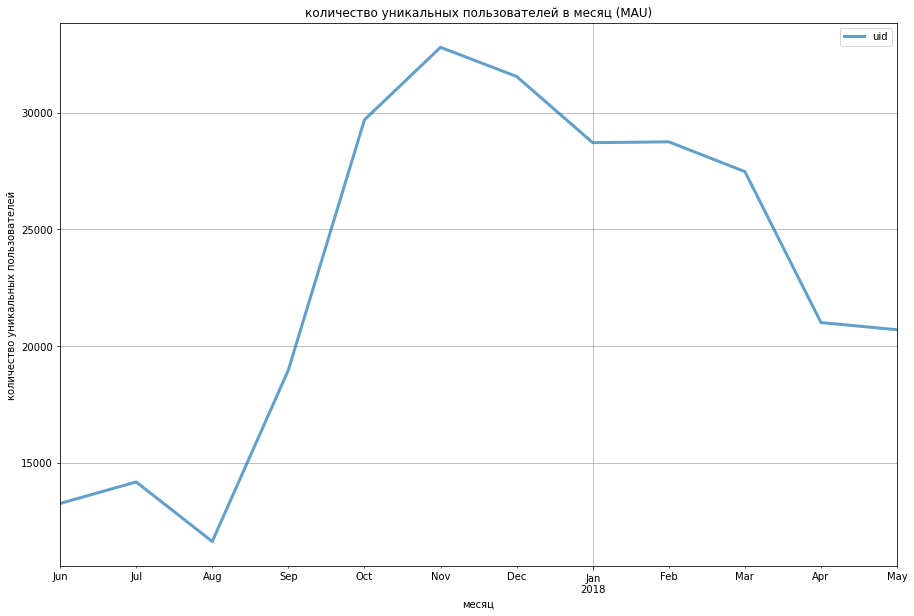

In [34]:
# Составим сводную таблицы с количеством уникальных пользователей по месяцам
mau_change = visits.groupby('session_month').agg({'uid': 'nunique'})
#Построим график
#датасет, название, ось х, ось у
print_plot(mau_change, 'количество уникальных пользователей в месяц (МAU)', 'месяц', 'количество уникальных пользователей')

В среднем, количество уникальных пользователей в день (DAU) - 907, количество уникальных пользователей в неделю (WAU) - 5621, количество уникальных пользователей в месяц (MAU) - 23225.

График по дням имеет более выраженные колебания, вероятно, связанные с днями недели. Какое-то событие вызвало 24 ноября 2017 года резкий приток пользователей, что видно по графику с днями. Количество новых пользователей уверенно росло до ноября 2017, а после стало снижаться и такая тенденция сохранилась до конца рассматриваемого периода.

In [35]:
# Посчитаем метрики по device = touch. Сгруппируем данные по уникальным пользователям и найдём среднее за весь период
dau_t = visits.query('device == "touch"').groupby('session_date').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в день (DAU) для touch -', int(dau_t))
wau_t = visits.query('device == "touch"').groupby('session_week').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в неделю (WAU) для touch -', int(wau_t))
mau_t = visits.query('device == "touch"').groupby('session_month').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в месяц (MAU) для touch -', int(mau_t))

Медианное кол-во уникальных пользователей в день (DAU) для touch - 264
Медианное кол-во уникальных пользователей в неделю (WAU) для touch - 1805
Медианное кол-во уникальных пользователей в месяц (MAU) для touch - 7474


In [36]:
# Посчитаем метрики по device = desktop. Сгруппируем данные по уникальным пользователям и найдём среднее за весь период
dau_d = visits.query('device == "desktop"').groupby('session_date').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в день (DAU) для desktop -', int(dau_d))
wau_d = visits.query('device == "desktop"').groupby('session_week').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в неделю (WAU) для desktop -', int(wau_d))
mau_d = visits.query('device == "desktop"').groupby('session_month').agg({'uid': 'nunique'}).median()
print('Медианное кол-во уникальных пользователей в месяц (MAU) для desktop -', int(mau_d))

Медианное кол-во уникальных пользователей в день (DAU) для desktop - 649
Медианное кол-во уникальных пользователей в неделю (WAU) для desktop - 4162
Медианное кол-во уникальных пользователей в месяц (MAU) для desktop - 17208


Количество уникальных посетителей в день более чем в 2 раза  выше с desktop, чем с touch.

#### Количество сессий в день

Определим, сколько раз за день пользователи в среднем заходят на сайт.

In [37]:
# Сгруппируем данные по дате и пользователям
visit_count_day = visits.groupby(['session_date', 'uid']).agg({'uid': 'count'})
visit_count_day.columns = ['uid_day']
display(visit_count_day.head(5))
print('В среднем, количество визитов пользователя в день - {:.2f}'.format(visit_count_day['uid_day'].mean()))

uid_day
session_date uid                        
2017-06-01   32197920403662046         1
             184148767273119549        2
             254239507810036143        1
             258099436367309303        1
             300776506671194537        1

В среднем, количество визитов пользователя в день - 1.09


In [38]:
# Посмотрим среднее количество сеессий пользователей в день в динамике
visit_count_day = visit_count_day.groupby('session_date').agg({'uid_day':'mean'})
visit_count_day.head(10)

,uid_day
session_date,
2017-06-01,1.097521
2017-06-02,1.082237
2017-06-03,1.071910
2017-06-04,1.071429
2017-06-05,1.089024
2017-06-06,1.097990
2017-06-07,1.127325
2017-06-08,1.081797
2017-06-09,1.086331


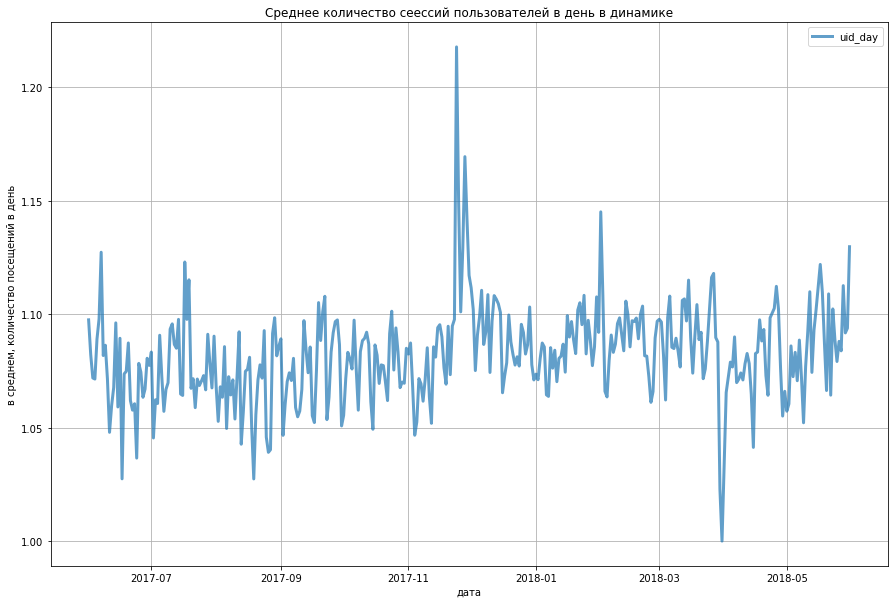

In [39]:
#Построим график
#датасет, название, ось х, ось у
print_plot(visit_count_day, 'Среднее количество сеессий пользователей в день в динамике', 'дата', 'в среднем, количество посещений в день')

In [40]:
# Дата пика сессий
visit_count_day.loc[visit_count_day.loc[:,'uid_day'] == visit_count_day['uid_day'].max()]

,uid_day
session_date,
2017-11-24,1.217837


Пользователи, в среднем, раз в день заходят на сайт (среднее число визитов - 1.09) и этот показатель не существенно меняется с течением времени. 24 ноября 2017 года был как пик посещений. Посмотрим как меняются показатели в зависимости от дня недели.

In [41]:
# Добавим в visits столбец session_dow - он покажет, в какой день недели пользователи заходили на сайт
visits['session_dow']  = visits['start_ts'].dt.dayofweek
visits[['uid', 'session_dow']].head(3)

,uid,session_dow
0,16879256277535980062,2
1,104060357244891740,0
2,7459035603376831527,5


In [42]:
# Сгруппируем по дню недели и пользователям
visit_count_dow = visits.groupby(['session_dow', 'uid']).agg({'uid': 'count'})
visit_count_dow.columns = ['uid_dow']
display(visit_count_dow)

uid_dow
session_dow uid                          
0           313578113262317             1
            325320750514679             1
            526778907996220             1
            673910773442622             1
            1260655184775459            2
...                                   ...
6           18445017950234606138        1
            18445147675727495770        1
            18445407535914413204        1
            18446104389491815722        1
            18446120301360161958        1

[293263 rows x 1 columns]

In [43]:
# Сгруппируем таблицу, подсчитав суммарные посещения по дню недели
visit_count_dow = visit_count_dow.groupby('session_dow').agg({'uid_dow':'sum'})
visit_count_dow

,uid_dow
session_dow,
0,56295
1,54515
2,52946
3,58515
4,54576
5,41751
6,40760


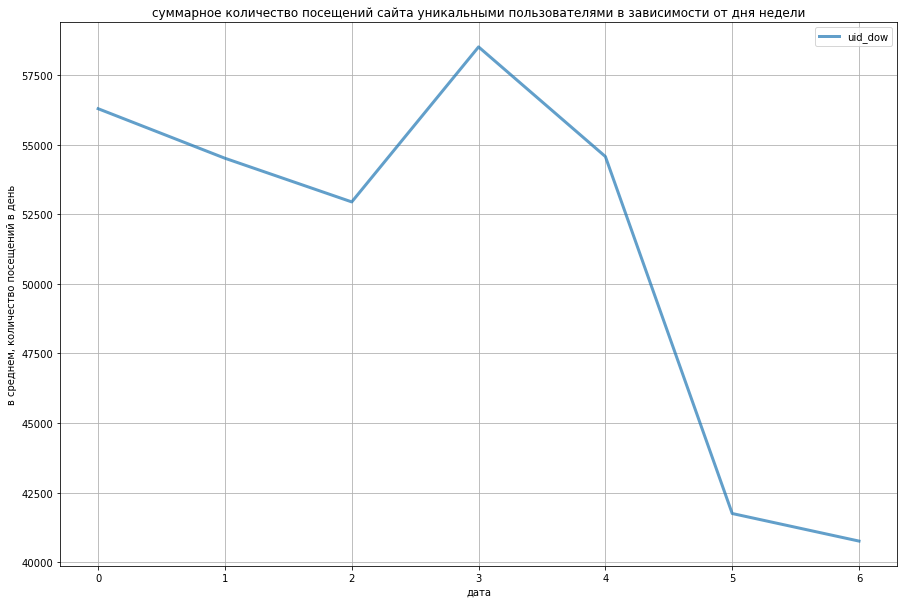

In [44]:
#Построим график
#датасет, название, ось х, ось у
print_plot(visit_count_dow, 'суммарное количество посещений сайта уникальными пользователями в зависимости от дня недели', 'дата', 'в среднем, количество посещений в день')

Судя по графику, больше всего посещений в будние дни, в выходные сайт посещают гораздо реже.

#### ASL
Исследуем, сколько времени пользователи проводят на сайте. Средняя продолжительность сессии или ASL (англ. average session length) показывает, сколько длится сессия пользователя в среднем. Найдём ASL — посчитаем длину всех сессий и вычислим среднее, в таблице уже есть столбец duration_sec - длина сессий.

In [45]:
# Удалим нулевые продолжительности, чтобы не искажать данные 
visits_no0 = visits.drop(visits[visits['duration_sec'] == 0].index)
print('Средняя продолжительность сессии, ASL -', int(visits_no0['duration_sec'].mean()), 'секунд')
print('Средняя продолжительность сессии touch, ASL -', int(visits_no0.query('device == "touch"')['duration_sec'].mean()), 'секунд')
print('Средняя продолжительность сессии desktop, ASL -', int(visits_no0.query('device == "desktop"')['duration_sec'].mean()), 'секунд')

Средняя продолжительность сессии, ASL - 714 секунд
Средняя продолжительность сессии touch, ASL - 548 секунд
Средняя продолжительность сессии desktop, ASL - 773 секунд


По среднему кажется, что посетители больше времени проводят на сайте если заходят с desktop. Так ли это, следует проверить, построив распределение продолжительности на гистограмме.

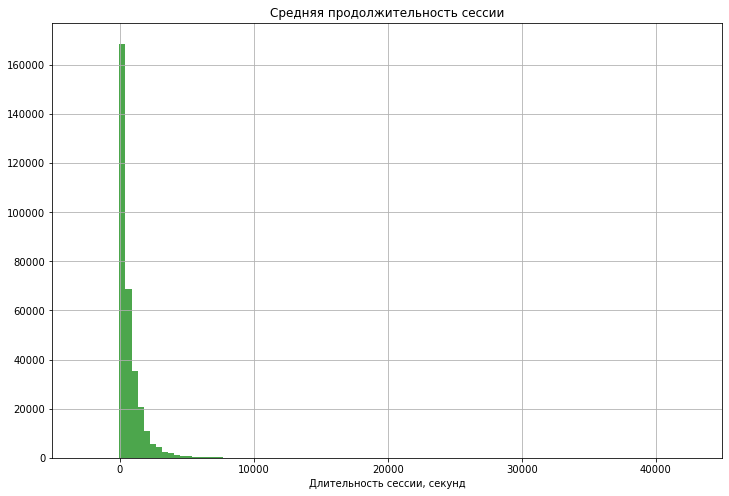

In [46]:
# Посмотрим на распределение:
visits_no0['duration_sec'].hist(bins=100, alpha = 0.7, figsize=(12, 8), grid = True, color='Green') 
plt.title('Средняя продолжительность сессии')
plt.ylabel('')
plt.xlabel('Длительность сессии, секунд')
plt.show()   

In [47]:
print('Мода продолжительность сессии -', int(visits_no0['duration_sec'].mode()), 'секунд')
print('Медианная продолжительность сессии -', int(visits_no0['duration_sec'].median()), 'секунд')

Мода продолжительность сессии - 60 секунд
Медианная продолжительность сессии - 360 секунд


In [48]:
print('Мода продолжительность сессии touch, ASL -', int(visits_no0.query('device == "touch"')['duration_sec'].mode()), 'секунд')
print('Мода продолжительность сессии desktop, ASL -', int(visits_no0.query('device == "desktop"')['duration_sec'].mode()), 'секунд')

Мода продолжительность сессии touch, ASL - 60 секунд
Мода продолжительность сессии desktop, ASL - 60 секунд


Распределение не похоже на нормальное, cреднее использовать не стоит, медианное значение также не оптимально, поскольку значения существенно смещены в одну сторону, лучше использовать моду (значение в выборке, которое встречается чаще всего).

Чаще всего, пользователи проводят минуту на сайте и при использовании desktop, и при использовании touch. Длительность сессии показывает, что чаще всего пользователи уходят с сайта довольно быстро, не заинтересовавшись и не сделав покупку. 

#### Рассчитаем Retention Rate

Применяя когортный анализ, расчитаем Retention Rate. Метрика показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Cформируем когорту - возьмём дату, когда пользователь впервые проявил активность. Эти данные запишем в cтолбец first_visit. 
Событием считаем первую активность на сервисе. Судя про графику WAU, берем месячную когорту, это достаточно репрезентативный период времени, по которому сможем судить о тенденциях. 

In [49]:
# Первая активность на сайте
first_visit = visits.groupby(['uid'])['session_date'].min()
first_visit.name = 'first_session_date'
display(first_visit.head(3))

uid
11863502262781     2018-03-01
49537067089222     2018-02-06
297729379853735    2017-06-07
Name: first_session_date, dtype: object

In [50]:
# Объединим его с исходным датафреймом visits
visits = visits.join(first_visit, on='uid') 

In [51]:
# Cформируем когорты по месяцам
visits['first_session_date'] = pd.to_datetime(visits['first_session_date'])
visits['first_activity_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')

Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты. В качестве делителя обратимся к константе np.timedelta64(1,'M')

In [52]:
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month'])/ np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
display(visits.head(3))

,device,end_ts,source_id,start_ts,uid,duration_sec,session_year,session_month,session_week,session_day,session_date,session_dow,first_session_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,20,2017-12-20,2,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,19,2018-02-19,0,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,2017-07-01,2017-06-29,1,2017-07-01,5,2017-07-01,2017-07-01,2017-07-01,0


In [53]:
# Сгруппируем данные по когорте и lifetime
# Посчитаем для каждой когорты количество уникальных пользователей на определённый месяц
cohorts_rr = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
cohorts_rr['first_activity_month'] = cohorts_rr['first_activity_month'].astype('datetime64[M]')
cohorts_rr

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13257
1,2017-06-01,1,1043
2,2017-06-01,2,712
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15708
76,2018-04-01,1,760


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. 

In [54]:
# Возьмём число пользователей на каждый новый месяц
initial_users_count = cohorts_rr[cohorts_rr['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_uid'}) 
initial_users_count['first_activity_month'] = initial_users_count['first_activity_month'].astype('datetime64[M]')
initial_users_count

,first_activity_month,cohort_uid
0,2017-06-01,13257
12,2017-07-01,13137
23,2017-08-01,10180
33,2017-09-01,16702
42,2017-10-01,25973
50,2017-11-01,27247
57,2017-12-01,25259
63,2018-01-01,22621
68,2018-02-01,22196
72,2018-03-01,20588


In [55]:
# Объединим данные по когортам с исходным количеством пользователей в когорте
cohorts_rr = cohorts_rr.merge(initial_users_count, on='first_activity_month') 
cohorts_rr.head(3)

,first_activity_month,cohort_lifetime,uid,cohort_uid
0,2017-06-01,0,13257,13257
1,2017-06-01,1,1043,13257
2,2017-06-01,2,712,13257


In [56]:
# Рассчитаем Retention Rate
# Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте
cohorts_rr['retention'] = cohorts_rr['uid']/cohorts_rr['cohort_uid'] 
cohorts_rr['first_activity_month']
cohorts_rr

,first_activity_month,cohort_lifetime,uid,cohort_uid,retention
0,2017-06-01,0,13257,13257,1.000000
1,2017-06-01,1,1043,13257,0.078675
2,2017-06-01,2,712,13257,0.053707
3,2017-06-01,3,814,13257,0.061402
4,2017-06-01,4,909,13257,0.068568
...,...,...,...,...,...
73,2018-03-01,1,861,20588,0.041820
74,2018-03-01,2,557,20588,0.027055
75,2018-04-01,0,15708,15708,1.000000
76,2018-04-01,1,760,15708,0.048383


In [57]:
cohorts_rr['first_activity_month'] = cohorts_rr['first_activity_month'].dt.date

In [58]:
# Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts_rr.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 
retention_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078675,0.053707,0.061402,0.068568,0.071434,0.061024,0.057781,0.05235,0.050841,0.040658,0.044957
2017-07-01,1.0,0.056101,0.051305,0.056177,0.058232,0.048185,0.045368,0.045749,0.038822,0.028621,0.02748,
2017-08-01,1.0,0.076817,0.062868,0.06277,0.050098,0.044008,0.036346,0.039489,0.027898,0.026031,,
2017-09-01,1.0,0.085499,0.069213,0.050712,0.039396,0.03784,0.035864,0.024189,0.022812,,,
2017-10-01,1.0,0.07862,0.052247,0.038925,0.034266,0.032226,0.021368,0.020367,,,,
2017-11-01,1.0,0.078284,0.044115,0.038683,0.033728,0.023415,0.021801,,,,,
2017-12-01,1.0,0.055822,0.037967,0.031118,0.02027,0.019043,,,,,,
2018-01-01,1.0,0.059723,0.039344,0.024977,0.020247,,,,,,,
2018-02-01,1.0,0.057082,0.025455,0.020094,,,,,,,,


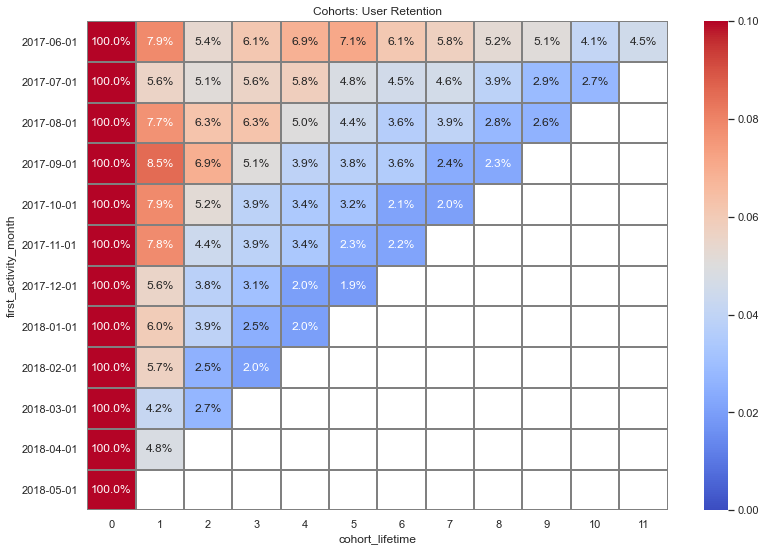

In [59]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'coolwarm', vmin=0, vmax=0.1)
plt.show()

In [60]:
# Найдем средний Retention Rate на второй месяц «жизни» когорт
retention_pivot = retention_pivot.reset_index()
print('средний Retention Rate на второй месяц: {:.1%}'.format(retention_pivot[1].mean()))

средний Retention Rate на второй месяц: 6.5%


In [61]:
print('средний Retention Rate по месяцам: ')
retention_pivot_mean = retention_pivot.mean(axis=0).reset_index()
retention_pivot_mean.style.format({0 : '{:.2%}'})

средний Retention Rate по месяцам: 


,cohort_lifetime,0
0,0,100.00%
1,1,6.52%
2,2,4.63%
3,3,4.28%
4,4,4.06%
5,5,3.95%
6,6,3.70%
7,7,3.75%
8,8,3.55%
9,9,3.52%


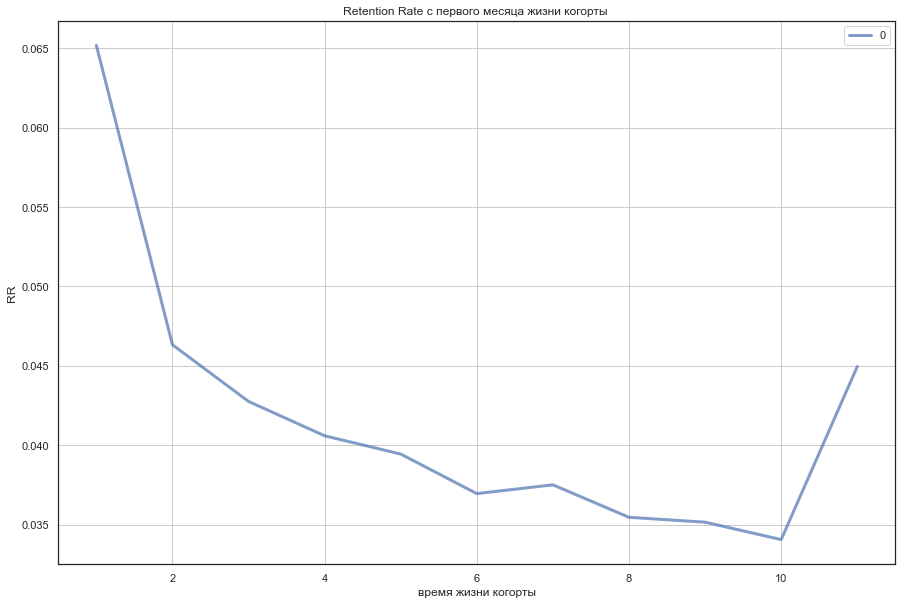

In [62]:
#Построим график
#датасет, название, ось х, ось у
print_plot(retention_pivot_mean[0][1:], 'Retention Rate c первого месяца жизни когорты ', 'время жизни когорты', 'RR')

Средний Retention Rate на второй месяц всего 6.52%. Столько пользователей возвращаются на второй месяц, на третий — 4.63%.
В последующие месяцы RR постепенно снижается - это означает, что если пользователь остался на второй месяц, то он скорее всего и далее будет пользоваться сайтом (подъем в конце графика не показателен - рассматривалась только одна когорта).

Коэффициент удержания падает c новыми когортами. Если для когорты 06-2017 на третий месяц был 6,1%, то для когорты 02-2018 он составляет 2%.
Это говорит о том, что с каждой новой когортой поведение пользователей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

#### Вывод

Изучили продуктовые метрики:

Расчитали среднее количествово уникальных пользователей в день (DAU) — 907, в неделю (WAU) — 56217, в месяц (MAU) — 23225. 
Какое-то событие вызвало 24 ноября 2017 года резкий приток пользователей. 
Количество новых пользователей росло до ноября 2017, а после стало снижаться, такая тенденция сохранилась до конца рассматриваемого периода.

Показатель отказов составляет 10%.

Пользователи, в среднем, раз в день заходят на сайт (среднее число визитов — 1.09).
Чаще сайт посещают в будние дни, в выходные сайт посещают реже. 

Самая распространенная продолжительность сессии ASL — 60 секунд.

Retention Rate на второй месяц пользования сайтом составляет в среднем 6.52%, на третий — 4.63% и далее снижается. 
Коэффициент удержания падает с каждой новой когортой.

### Метрики электронной коммерции

#### Время до первой покупки

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения первой покупки. Для этого объединим таблицы visits и orders по столбцу uid. Поскольку мы объединяем таблицы по основной (orders), то и рассматривать будем только тех посетителей, кто совершил покупки, чьи uid содержатся в  orders.

In [63]:
# число пользователей в таблицах
print('число пользователей-покупателей в таблице orders', orders['uid'].nunique())
print('число пользователей в таблице visits', visits['uid'].nunique())
print('процент пользователей, которые не совершали покупки {:.1%}'
      .format((visits['uid'].nunique() - orders['uid'].nunique())/visits['uid'].nunique()))

число пользователей-покупателей в таблице orders 36509
число пользователей в таблице visits 228139
процент пользователей, которые не совершали покупки 84.0%


In [64]:
# Сгруппируем данные по столбцу uid и минимальному сроку первой активности
first_activ_user = visits.groupby('uid')['start_ts'].min().reset_index()
first_activ_user.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [65]:
# Сгруппируем данные по столбцу uid и минимальному сроку первой покупки
first_orders_user = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders_user.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [66]:
# Соединим по пользователям
first_orders_delta = first_orders_user.merge(first_activ_user, on='uid',  how='inner')
first_orders_delta.head()

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [67]:
# В столбце time_to_buy зафиксируем разницу между покупкой и временем первой активности 
first_orders_delta['time_to_buy']=first_orders_delta['buy_ts'] - first_orders_delta['start_ts'] 
first_orders_delta.head(3)

,uid,buy_ts,start_ts,time_to_buy
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00


In [68]:
# Узнаем промежуток в днях
first_orders_delta['time_to_buy'] = first_orders_delta['time_to_buy']/ np.timedelta64(1,'D')
first_orders_delta = first_orders_delta.query('time_to_buy >= 0')
first_orders_delta['time_to_buy'] = first_orders_delta['time_to_buy'].astype('int')
first_orders_delta.head(3)

,uid,buy_ts,start_ts,time_to_buy
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0


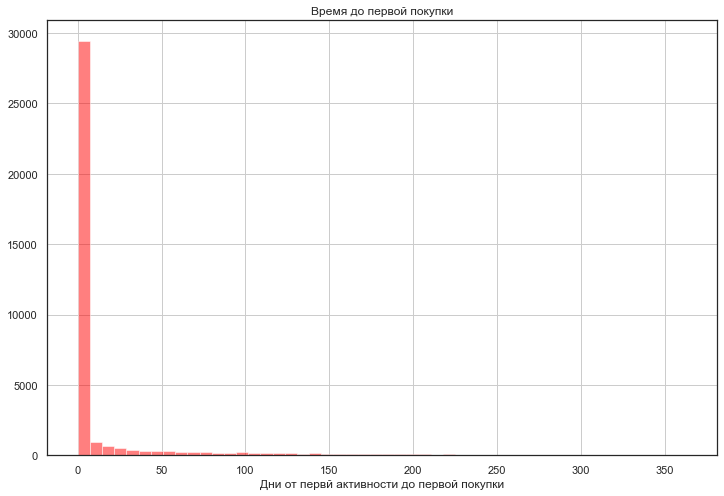

In [69]:
first_orders_delta['time_to_buy'].hist(bins=50, alpha = 0.5, figsize=(12, 8), grid = True, color='Red') 
plt.title('Время до первой покупки')
plt.ylabel('')
plt.xlabel('Дни от первй активности до первой покупки')
plt.show()   

Распределение не похоже на нормальное, поэтому вместо использования среднего, рассчитаем моду (значение в выборке, которое встречается чаще всего) и проверим медиану:

In [70]:
print('Наиболее вероятное количество дней до первой покупки -', int(first_orders_delta['time_to_buy'].mode()))
print('Медианное количество дней до первой покупки -', int(first_orders_delta['time_to_buy'].median()))

Наиболее вероятное количество дней до первой покупки - 0
Медианное количество дней до первой покупки - 0


Большинство посетителей первую покупку делают в тот же день, когда приходят на сайт впервые.

#### Среднее количество покупок за период

Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев.

In [71]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [72]:
# Месяц первого заказа
first_orders_month = orders.groupby(['uid'])['buy_ts'].min()
first_orders_month.name = 'first_ord_month'

In [73]:
# Объединение таблиц
orders_6m = orders.join(first_orders_month, on='uid') 

In [74]:
orders_6m['first_session_date'] = pd.to_datetime(orders_6m['first_ord_month'])
orders_6m['first_ord_month'] = orders_6m['first_ord_month'].astype('datetime64[M]')
orders_6m['buy_ts'] = orders_6m['buy_ts'].astype('datetime64[M]')
orders_6m = orders_6m[['buy_ts','revenue', 'uid', 'first_ord_month']]

In [75]:
orders_6m

,buy_ts,revenue,uid,first_ord_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01
50411,2018-05-01,5.80,11369640365507475976,2018-05-01
50412,2018-05-01,0.30,1786462140797698849,2018-05-01
50413,2018-05-01,3.67,3993697860786194247,2018-05-01


In [76]:
# Добавим столбец с временем жизни когорты
orders_6m['cohort_lifetime'] = (orders_6m['buy_ts'] - orders_6m['first_ord_month'])/ np.timedelta64(1, 'M')
orders_6m['cohort_lifetime'] = orders_6m['cohort_lifetime'].round().astype('int') 
orders_6m

,buy_ts,revenue,uid,first_ord_month,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01,0
1,2017-06-01,0.55,11627257723692907447,2017-06-01,0
2,2017-06-01,0.37,17903680561304213844,2017-06-01,0
3,2017-06-01,0.55,16109239769442553005,2017-06-01,0
4,2017-06-01,0.37,14200605875248379450,2017-06-01,0
...,...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01,0
50411,2018-05-01,5.80,11369640365507475976,2018-05-01,0
50412,2018-05-01,0.30,1786462140797698849,2018-05-01,0
50413,2018-05-01,3.67,3993697860786194247,2018-05-01,0


In [77]:
# Сгруппируем данные по месяцу покупки и lifetime когорты
# Посчитаем для каждой когорты количество покупок на определённый месяц
cohorts_6m_gr = orders_6m.groupby(['first_ord_month','cohort_lifetime']).agg({'uid':'count'}).reset_index() 
cohorts_6m_gr['first_ord_month'] = cohorts_6m_gr['first_ord_month'].astype('datetime64[M]')

In [78]:
initial_users_6m = cohorts_6m_gr[cohorts_6m_gr['cohort_lifetime'] == 0][['first_ord_month', 'uid']]
initial_users_6m = initial_users_6m.rename(columns={'uid':'count_b'}) 
initial_users_6m['first_ord_month'] = initial_users_6m['first_ord_month'].astype('datetime64[M]')
# count_b - число покупок на каждую когорту
cohorts_6m_gr = cohorts_6m_gr.merge(initial_users_6m, on='first_ord_month') 
cohorts_6m_gr

,first_ord_month,cohort_lifetime,uid,count_b
0,2017-06-01,0,2353,2353
1,2017-06-01,1,177,2353
2,2017-06-01,2,171,2353
3,2017-06-01,3,224,2353
4,2017-06-01,4,291,2353
...,...,...,...,...
74,2018-03-01,2,176,4131
75,2018-04-01,0,2487,2487
76,2018-04-01,1,195,2487
77,2018-05-01,0,3247,3247


In [79]:
# Посчитаем для каждой когорты количество уникальных пользователей на определённый месяц
cohorts_buy = orders_6m.groupby(['first_ord_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_buy = cohorts_buy.rename(columns={'uid':'count_uid'}) 
cohorts_buy['first_ord_month'] = cohorts_buy['first_ord_month'].astype('datetime64[M]')
cohorts_buy

,first_ord_month,cohort_lifetime,count_uid
0,2017-06-01,0,2022
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,87
...,...,...,...
74,2018-03-01,2,58
75,2018-04-01,0,2274
76,2018-04-01,1,69
77,2018-05-01,0,2986


Посчитаем среднее количество покупок за 6 месяцев, объединив таблицу с данными по кол-ву покупателей

In [80]:
# Объединим таблицы 
cohorts_6m_gr = cohorts_6m_gr.merge(cohorts_buy, on=['first_ord_month', 'cohort_lifetime'], how='inner')
cohorts_6m_gr = cohorts_6m_gr.rename(columns={'uid':'count_purchases'}) 

In [81]:
# Количество покупок на одного покупателя 
cohorts_6m_gr['mean'] = cohorts_6m_gr['count_purchases']  / cohorts_6m_gr['count_uid'] 
cohorts_6m_gr

,first_ord_month,cohort_lifetime,count_purchases,count_b,count_uid,mean
0,2017-06-01,0,2353,2353,2022,1.163699
1,2017-06-01,1,177,2353,61,2.901639
2,2017-06-01,2,171,2353,50,3.420000
3,2017-06-01,3,224,2353,54,4.148148
4,2017-06-01,4,291,2353,87,3.344828
...,...,...,...,...,...,...
74,2018-03-01,2,176,4131,58,3.034483
75,2018-04-01,0,2487,2487,2274,1.093668
76,2018-04-01,1,195,2487,69,2.826087
77,2018-05-01,0,3247,3247,2986,1.087408


In [82]:
cohorts_6m_gr_piv = cohorts_6m_gr.pivot_table(
    index='first_ord_month',    columns='cohort_lifetime',    values='mean',    aggfunc='mean',) 

cohorts_6m_gr_piv.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_ord_month,,,,,,,,,,,,
2017-06-01,1.163699,2.901639,3.42,4.148148,3.344828,3.253731,4.508197,3.702128,3.655172,3.4,2.133333,1.622642
2017-07-01,1.136837,1.923077,2.105263,1.625,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,
2017-08-01,1.119065,1.862069,1.886792,1.840909,2.125,1.9375,1.633333,1.772727,2.421053,1.483871,,
2017-09-01,1.136487,1.689922,1.616162,2.216216,1.288462,1.703125,1.621212,1.513514,1.418605,,,
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,,,,
2017-11-01,1.176802,1.764706,1.516667,1.990566,1.6875,1.229167,1.645161,,,,,
2017-12-01,1.152511,1.849315,1.961165,1.845361,1.72,1.666667,,,,,,
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,,,,,,,
2018-02-01,1.121337,1.881356,1.431034,1.794872,,,,,,,,


Нас интересуют только когорты прожившие более 6мес. и данные по когортам минимум за 6 месяцев, те 2017-01-11 и ранее, они образуют прямоугольник 6х6 в левом верхнем углу.

In [83]:
mean_6m = cohorts_6m_gr_piv.iloc[:6, :6]
mean_6m

cohort_lifetime,0,1,2,3,4,5
first_ord_month,,,,,,
2017-06-01,1.163699,2.901639,3.420000,4.148148,3.344828,3.253731
2017-07-01,1.136837,1.923077,2.105263,1.625000,1.469388,2.157895
2017-08-01,1.119065,1.862069,1.886792,1.840909,2.125000,1.937500
2017-09-01,1.136487,1.689922,1.616162,2.216216,1.288462,1.703125
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556
2017-11-01,1.176802,1.764706,1.516667,1.990566,1.687500,1.229167


In [84]:
# Среднее количество покупок за 6 месяцев
mean_6m_sum = mean_6m.sum(axis=1)
print('Среднее количество покупок за 6 месяцев на одного покупателя: {:.2f}'.format(mean_6m_sum.mean()))

Среднее количество покупок за 6 месяцев на одного покупателя: 11.09


In [85]:
#Посчитаем медианное значение по количеству покупок в месяц
print('Медианное число покупок в месяц на одного покупателя: {:.2f}'.format(cohorts_6m_gr['mean'].mean()))

Медианное число покупок в месяц на одного покупателя: 1.86


Таким образом, если медианное количество покупок в месяц для пользователя - 1,86, а за 6 месяцев покупатель приобретет товар примерно 11 раз.

(Уточнение: мы рассматривали таблицу с заказами, те только те пользователи, которые совершают покупки, число пользователей в таблице orders - 36509. Всего же число пользователей в таблице visits - 228139, те многие (84%) покупок не совершают).

#### Cредний чек 

Рассчитаем средний чек, применяя группировку по месяцу совершения покупки. 

In [86]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [87]:
# Сгруппируем 
orders_grouped = orders.groupby(['buy_month']).agg({'revenue': 'sum', 'uid': 'count'})
display(orders_grouped.head(5)) 

,revenue,uid
buy_month,,
2017-06-01,9557.49,2353
2017-07-01,12539.47,2362
2017-08-01,8758.78,1803
2017-09-01,18345.51,3383
2017-10-01,27987.70,5677


In [88]:
# Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid
orders_grouped['revenue_per_user'] = orders_grouped['revenue'] / orders_grouped['uid']
orders_grouped = orders_grouped.query('uid > 1')
orders_grouped = orders_grouped['revenue_per_user']
print('Средний чек по сгруппированным данным, ye: {:.2f}'.format(orders_grouped.mean()))

Средний чек по сгруппированным данным, ye: 4.96


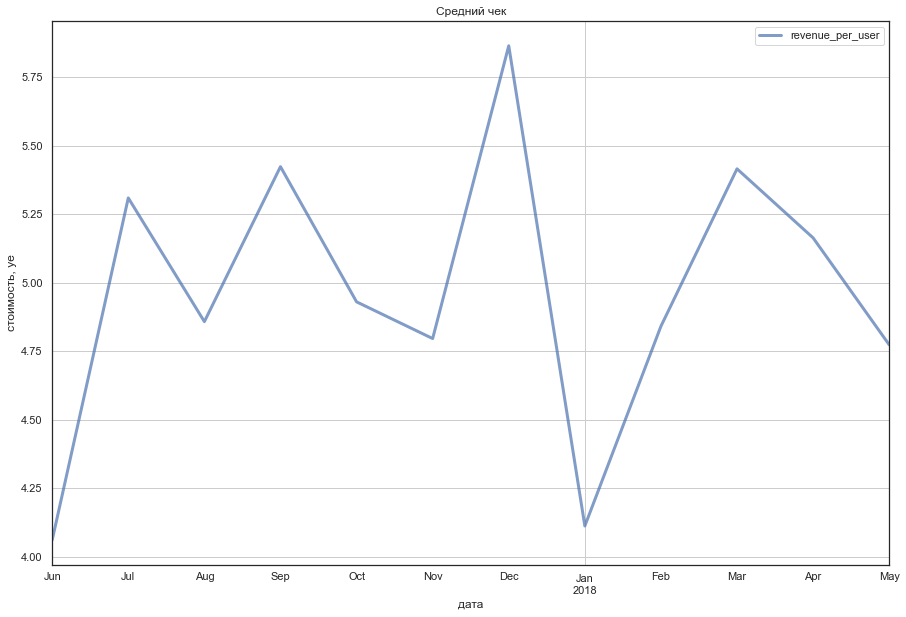

In [89]:
#Построим график
#датасет, название, ось х, ось у
print_plot(orders_grouped, 'Средний чек', 'дата', 'стоимость, уе')

In [90]:
# Средний чек рассчитаем как сумму всех покупок на количество покупок

print('Средний чек по несгруппированным данным, ye: {:.2f}'.format(orders['revenue'].mean()))

Средний чек по несгруппированным данным, ye: 5.00


Средний чек менялся со временем. В декабре он был выше всего, вероятно, из-за праздников, повышался также в сентябре. В апреле и июле тоже есть повышения. В июне он ниже всего и падает сразу после новогодних праздников.

Корректнее взять средний чек по несгруппированным данным, поэтому можем принять его как 5 уе.

#### LTV

Выясним, как меняется LTV на покупателя по когортам. Маржинальность сервиса — 100%

LTV удобно считать по когортам таким образом:
- найти дату первой покупки каждого покупателя;
- вычислить число новых покупателей за каждую дату;
- добавить дату первой покупки в таблицу с заказами;
- сгруппировать таблицу и посчитать выручку.

In [91]:
# Получим месяц первой покупки каждого покупателя
first_buy_month = orders.groupby('uid').agg({'buy_month' : 'min'}).reset_index()
first_buy_month.columns = ['uid', 'first_buy_month']
first_buy_month.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [92]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = first_buy_month.groupby('first_buy_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [93]:
# Совместим таблицы orders и first_buy_month по uid
orders_first = pd.merge(orders, first_buy_month, on='uid')

In [94]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 
# Сбросим индекс методом reset_index()
cohort_ltv = orders_first.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
cohort_ltv.head(5)

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [95]:
report_ltv = pd.merge(cohort_sizes, cohort_ltv, on='first_buy_month')
report_ltv.head()

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2022,2017-06-01,9557.49
1,2017-06-01,2022,2017-07-01,981.82
2,2017-06-01,2022,2017-08-01,885.34
3,2017-06-01,2022,2017-09-01,1931.30
4,2017-06-01,2022,2017-10-01,2068.58


In [96]:
# LTV считаем из валовой прибыли, умножив выручку на маржинальность 
margin_rate = 1
report_ltv['gp'] = report_ltv['revenue'] * margin_rate
report_ltv['age'] = (report_ltv['buy_month'] - report_ltv['first_buy_month'])/ np.timedelta64(1, "M")
report_ltv['age'] = report_ltv['age'].round().astype('int')
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']
report_ltv.head(5)

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0,4.726751
1,2017-06-01,2022,2017-07-01,981.82,981.82,1,0.485569
2,2017-06-01,2022,2017-08-01,885.34,885.34,2,0.437854
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3,0.955143
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4,1.023037


Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. 
Для наглядности визуализируем когорты в виде сводной таблицы

In [97]:
report_ltv['first_buy_month'] = report_ltv['first_buy_month'].dt.date

In [98]:
# Построим сводную таблицу, в строках которой будет месяц когорты, в столбцах — её возраст, а в значениях — средний LTV
output = report_ltv.pivot_table(
    index='first_buy_month', columns='age', values='ltv', aggfunc='mean'
).round(2)
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.73,0.49,0.44,0.96,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.65,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.16,0.4,0.2,0.33,0.15,0.05,0.12,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


In [99]:
# Построим таблицу с кумулятивной суммой LTV
cum_ltv = output.cumsum(axis=1)
cum_ltv.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.73,5.22,5.66,6.62,7.64,8.38,9.33,9.91,10.46,11.07,11.64,11.9
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.65,6.77,7.29,11.27,11.67,12.32,13.02,13.26,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.16,5.56,5.76,6.09,6.24,6.29,6.41,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


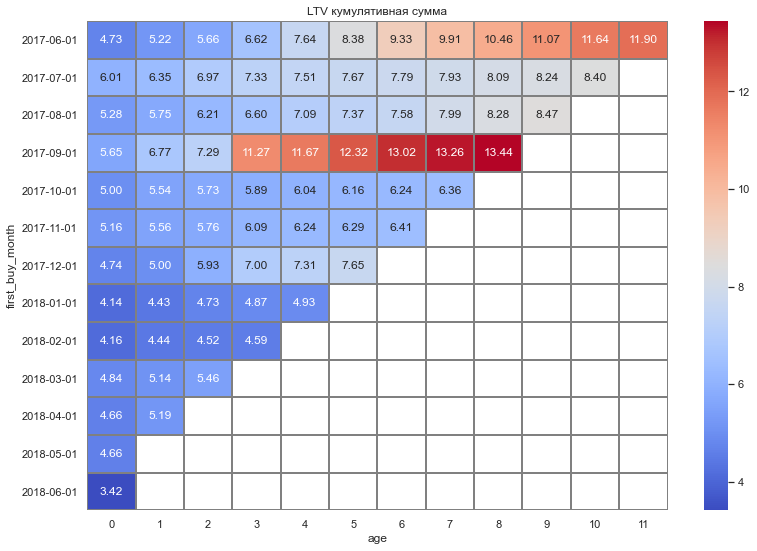

In [100]:
plt.figure(figsize=(13, 9))
plt.title('LTV кумулятивная сумма')
sns.heatmap(cum_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
plt.show()

Самая старшая когорта 2017-06-01 и когорта 2017-09-01самые прибыльные, показывают самый крупный LTV. 

Рассчитаем средний LTV по когортам за 6 месяцев и в расчёт включим когорты, «прожившие» не менее 6 месяцев, посмотрим эти данные:

In [101]:
cum_ltv_6m = cum_ltv.iloc[:6, :6]
cum_ltv_6m

age,0,1,2,3,4,5
first_buy_month,,,,,,
2017-06-01,4.73,5.22,5.66,6.62,7.64,8.38
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37
2017-09-01,5.65,6.77,7.29,11.27,11.67,12.32
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16
2017-11-01,5.16,5.56,5.76,6.09,6.24,6.29


In [102]:
# Средняя кумулятивная сумма по когортам относительно возраста когорты
cum_ltv_6mean = cum_ltv_6m.mean(axis=0)
cum_ltv_6mean

age
0    5.305000
1    5.865000
2    6.270000
3    7.300000
4    7.698333
5    8.031667
dtype: float64

Cредний LTV по старшим когортам на 6й месяц составляет 8,03 уе.

Это означает, чтобы вложения окупились, на 6й месяц затраты на пользователя не должны превышать 8,03 уе.

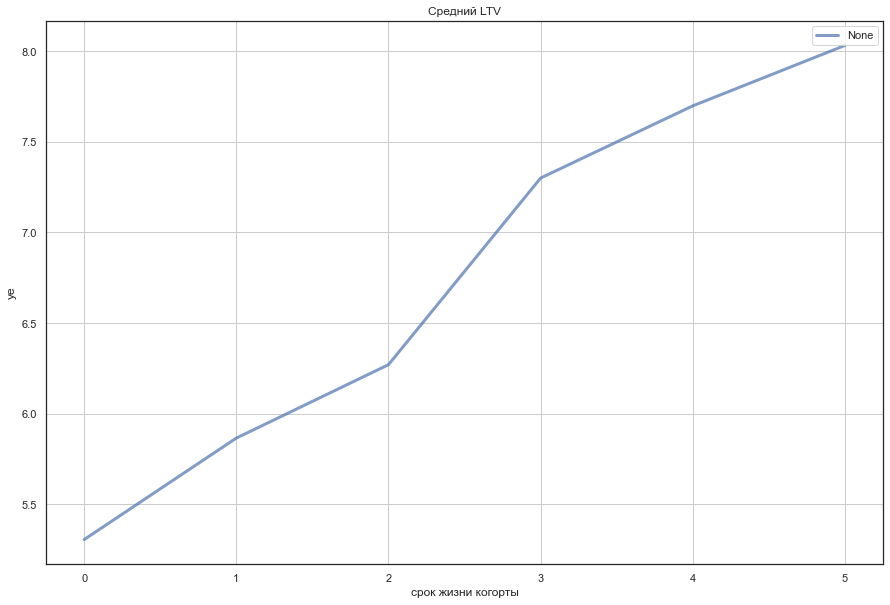

In [103]:
#Построим график
#датасет, название, ось х, ось у
print_plot(cum_ltv_6mean, 'Cредний LTV', 'срок жизни когорты', 'уе')

График имеет выпуклость вниз, LTV показывает равномерную тенденцию роста.

#### Вывод

Изучили метрики электронной коммерции.

Большинство посетителей первую покупку делают в тот же день, когда приходят на сайт впервые. 
Среди тех, кто делал покупки, среднее их количество за 6 месяцев - 11шт. Медианное число покупок в месяц на одного покупателя: 1.86

Средний чек - 5 уе. 
Средний чек в декабре наиболее высок, повышался также в сентябре, июле, апреле. В начале января он ниже всего и падает также в июне.

Была расчитана метрика LTV для когорт старше 6 месяцев и показан ее рост. Cредний LTV по когортам старше 6 месяцев через полгода достигает 8,03 уе.

### Маркетинговые метрики

Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам. 

In [104]:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [105]:
# Посчитаем процент затрат на каждый источник
costs_source = costs.groupby('source_id')['costs'].sum()
costs_source = costs_source.sort_values(ascending = False).reset_index()
costs_source['cost_%'] = costs_source['costs']/costs['costs'].sum()
costs_source.style.format({('cost_%'):'{:.2%}'})

,source_id,costs,cost_%
0,3,141321.630000,42.94%
1,4,61073.600000,18.56%
2,5,51757.100000,15.73%
3,2,42806.040000,13.01%
4,1,20833.270000,6.33%
5,10,5822.490000,1.77%
6,9,5517.490000,1.68%


In [106]:
print('Общая сумма расходов на маркетинг, уе -', costs['costs'].sum())

Общая сумма расходов на маркетинг, уе - 329131.62


In [107]:
# Разобъем затраты по месяцам
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs_group = costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum')
costs_group

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


Всего на маркетинг потрачено  329131 уе, из которых большая доля относится к источнику 3 (43%), далее источник 4 (19%), источники 5 и 2 занимают 16 и 13 % соотвественно. Наименее значимый по затратам - источник 6 (1,7%).

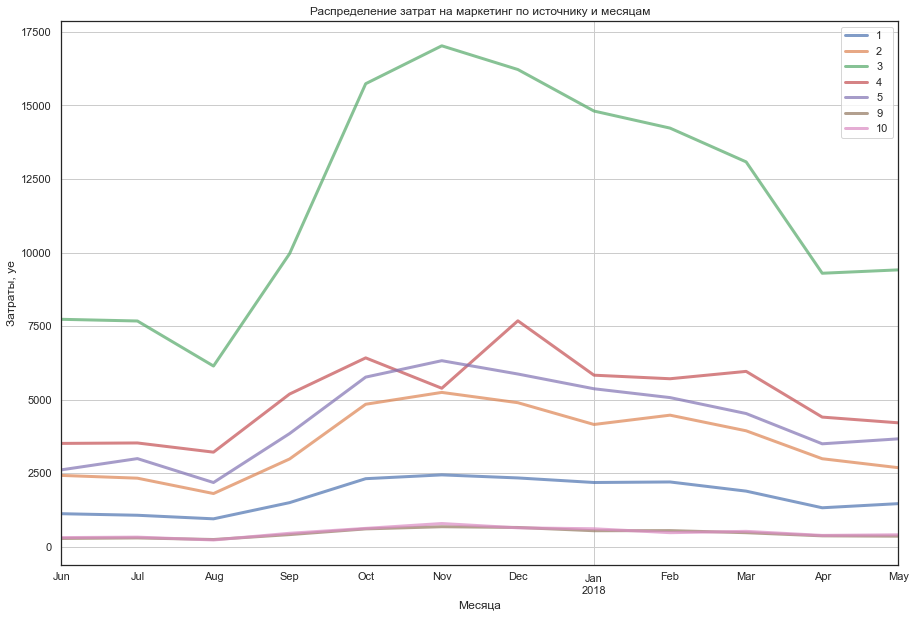

In [108]:
#Построим график
#датасет, название, ось х, ось у
print_plot(costs_group, 'Распределение затрат на маркетинг по источнику и месяцам', 'Месяца', 'Затраты, уе')

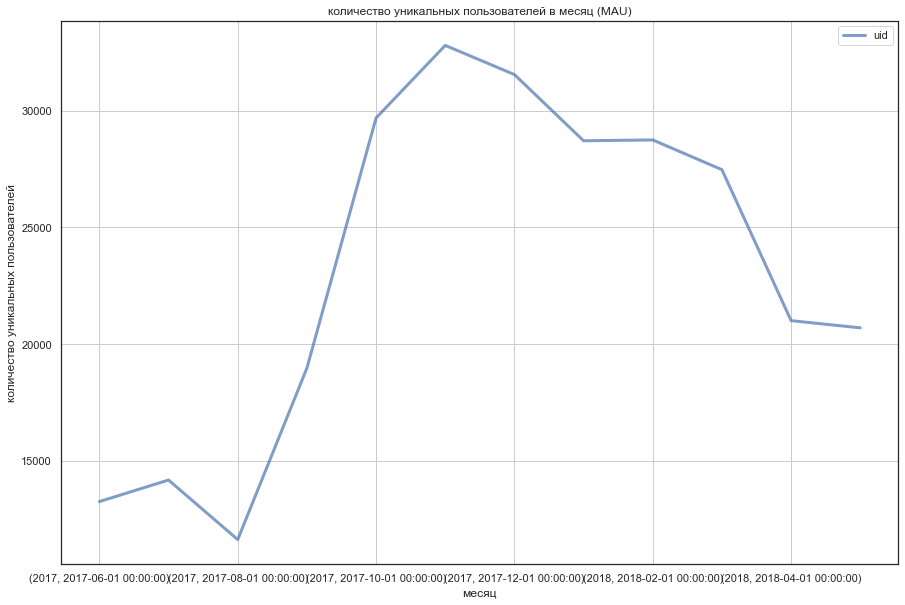

In [109]:
# Составим сводную таблицы с количеством уникальных пользователей по месяцам
mau_change = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
#Построим график
#датасет, название, ось х, ось у
print_plot(mau_change, 'количество уникальных пользователей в месяц (МAU)', 'месяц', 'количество уникальных пользователей')

Судя по графику, расходы на рекламную компанию по источнику 3 существенно увеличивались с августа 2017 по ноябрь 2017, после чего последовал спад. В целом, затраты на все источники поднимались начиная с августа 2017 и снижались до апреля 2018.

При расчете DAU было видно, что 24 ноября был серьезный подъем количества новых уникальных пользователей. На графике как раз виден к ноябрю 2017 подъем затрат по 3 источнику. Посмотрим на день, в который затраты были максимальны.

График Распределение затрат на маркетинг по источнику и месяцам очень похож по контуру на график количество уникальных пользователей в месяц (МAU), можно предположить корреляцию.

In [110]:
costs_group = costs_group.reset_index()
costs_group_max=costs_group.loc[costs_group.loc[:,3] == costs_group[3].max()]
costs_group_max

source_id,cost_month,1,2,3,4,5,9,10
5,2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36


Итак, после возрастающих затрат по 3 источнику до 11 ноября 2017 года получили большой приток новых клиентов 24 ноября 2017 года. 

#### САС 

Рассчитаем среднюю стоимость привлечания одного клиента (CAC) для всего проекта и для каждого источника трафика.
Посчитаем CAC каждой когорты. 

In [111]:
costs.head(5)

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Сначала найдём суммарные расходы за каждый месяц, а затем поделим их на количество покупателей в каждой когорте

In [112]:
# считаем расходы за месяц с разделением по источникам
monthly_costs = costs.groupby('cost_month')['costs'].sum()
monthly_costs = monthly_costs.reset_index()
monthly_costs.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [113]:
# Добавим данные о расходах в отчёт 
report_ltv['first_buy_month'] = report_ltv['first_buy_month'].astype('datetime64[M]')
report_ltv.head()
report_cac = pd.merge(
    report_ltv, monthly_costs, left_on='first_buy_month', right_on='cost_month'
)
report_cac

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv,cost_month,costs
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0,4.726751,2017-06-01,18015.00
1,2017-06-01,2022,2017-07-01,981.82,981.82,1,0.485569,2017-06-01,18015.00
2,2017-06-01,2022,2017-08-01,885.34,885.34,2,0.437854,2017-06-01,18015.00
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3,0.955143,2017-06-01,18015.00
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4,1.023037,2017-06-01,18015.00
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3534,2018-04-01,1063.05,1063.05,1,0.300806,2018-03-01,30415.27
74,2018-03-01,3534,2018-05-01,1114.87,1114.87,2,0.315470,2018-03-01,30415.27
75,2018-04-01,2274,2018-04-01,10600.69,10600.69,0,4.661693,2018-04-01,22289.38
76,2018-04-01,2274,2018-05-01,1209.92,1209.92,1,0.532067,2018-04-01,22289.38


In [114]:
# посчитаем CAC
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
report_cac.head()

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv,cost_month,costs,cac
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0,4.726751,2017-06-01,18015.0,8.909496
1,2017-06-01,2022,2017-07-01,981.82,981.82,1,0.485569,2017-06-01,18015.0,8.909496
2,2017-06-01,2022,2017-08-01,885.34,885.34,2,0.437854,2017-06-01,18015.0,8.909496
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3,0.955143,2017-06-01,18015.0,8.909496
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4,1.023037,2017-06-01,18015.0,8.909496


In [115]:
# Сгруппируем по месяцу
report_cac_gr = report_cac.groupby('cost_month')['cac'].mean()
report_cac_gr

cost_month
2017-06-01     8.909496
2017-07-01     9.490421
2017-08-01    10.803901
2017-09-01     9.448976
2017-10-01     8.369327
2017-11-01     9.295704
2017-12-01     8.747797
2018-01-01     9.937302
2018-02-01     8.962758
2018-03-01     8.606471
2018-04-01     9.801838
2018-05-01     7.442823
Name: cac, dtype: float64

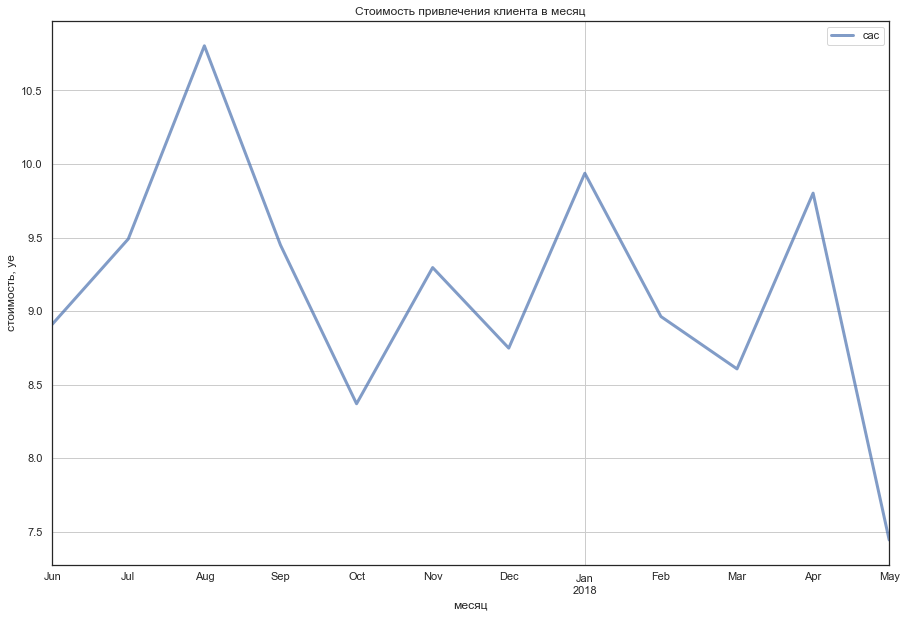

In [116]:
#Построим график
#датасет, название, ось х, ось у
print_plot(report_cac_gr, 'Стоимость привлечения клиента в месяц', 'месяц', 'стоимость, уе')

In [117]:
# CAC средний показатель
print('САС, в среднем для всего проекта - {:.1f} уе'.format(report_cac_gr.mean()))

САС, в среднем для всего проекта - 9.2 уе


В среднем, стоимость привлечния клиента составляет 9.2 уе. В августе этот показатель был выше всего, ниже всего - в конце мая. Посмотрим распределение по источникам.

Для каждого покупателя нужно определить источник первого визита. Каждый покупатель ассоциируется с первым источником, из которого он пришел. Зная это, можно посчитать число покупателей с группировкой по источнику и дате, объединить эти данные с costs и посчитать CAC.

- найдем, первый рекламный источник, из которого пришел каждый пользователь. Здесьстоит отсортровать visits по дате, сгруппировать по uid и использовать first(). Далее добавляем источник и готово.

In [118]:
# Найдем первый рекламный источник для каждого пользователя
visits_cac_1 = visits.sort_values(by='first_session_date').groupby('uid').agg({'source_id':'first'}).reset_index()
visits_cac_1

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228134,18446403737806311543,5
228135,18446424184725333426,4
228136,18446556406699109058,3
228137,18446621818809592527,4


In [119]:
# Найдем первый месяц заказа и первый день в orders
orders_first['first_buy_day'] = orders_first['buy_ts'].astype('datetime64[D]')
orders_first

,buy_ts,revenue,uid,buy_month,first_buy_month,first_buy_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50359,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31
50360,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31
50361,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31
50362,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31


In [120]:
# объединим таблицы
visits_cac_orders = orders_first.merge(visits_cac_1, on='uid', how='inner')

In [121]:
visits_cac_orders

,buy_ts,revenue,uid,buy_month,first_buy_month,first_buy_day,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...
50358,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31,4
50359,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31,10
50360,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31,3
50361,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31,5


In [122]:
# cгруппируем по источнику и дню
visits_cac_orders_gr = visits_cac_orders.groupby(['source_id', 'first_buy_day'])['uid'].count().reset_index()
visits_cac_orders_gr

,source_id,first_buy_day,uid
0,1,2017-06-01,19
1,1,2017-06-02,9
2,1,2017-06-03,11
3,1,2017-06-04,6
4,1,2017-06-05,23
...,...,...,...
2473,10,2018-05-27,3
2474,10,2018-05-28,9
2475,10,2018-05-29,10
2476,10,2018-05-30,6


In [123]:
#соединяем с costs
visits_cac_orders_costs = visits_cac_orders_gr.merge(costs, left_on=['source_id', 'first_buy_day'], right_on=['source_id', 'dt'])
visits_cac_orders_costs

,source_id,first_buy_day,uid,dt,costs,cost_month
0,1,2017-06-01,19,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,9,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,11,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,6,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,23,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...,...
2472,10,2018-05-27,3,2018-05-27,9.92,2018-05-01
2473,10,2018-05-28,9,2018-05-28,21.26,2018-05-01
2474,10,2018-05-29,10,2018-05-29,11.32,2018-05-01
2475,10,2018-05-30,6,2018-05-30,33.15,2018-05-01


In [124]:
# посчитаем CAC
visits_cac_orders_costs['cac'] = visits_cac_orders_costs['costs'] / visits_cac_orders_costs['uid']
visits_cac_orders_costs.head()

,source_id,first_buy_day,uid,dt,costs,cost_month,cac
0,1,2017-06-01,19,2017-06-01,75.20,2017-06-01,3.957895
1,1,2017-06-02,9,2017-06-02,62.25,2017-06-01,6.916667
2,1,2017-06-03,11,2017-06-03,36.53,2017-06-01,3.320909
3,1,2017-06-04,6,2017-06-04,55.00,2017-06-01,9.166667
4,1,2017-06-05,23,2017-06-05,57.08,2017-06-01,2.481739


In [125]:
# Суммируем расходы по месяцам по источникам
visits_cac_orders_costs_piv = visits_cac_orders_costs.pivot_table(index='cost_month', columns='source_id', values='cac', aggfunc='sum')

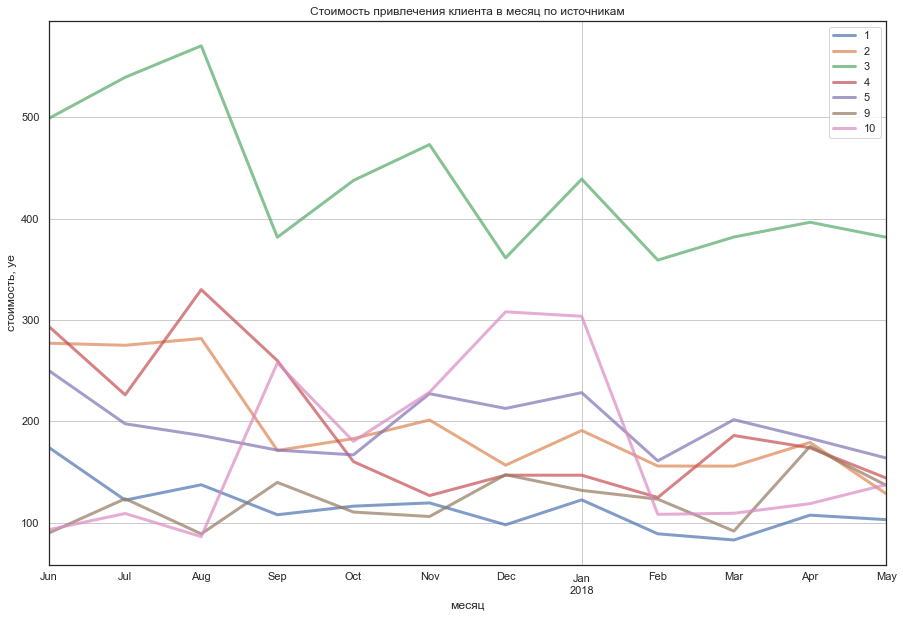

In [126]:
#Построим график
#датасет, название, ось х, ось у
print_plot(visits_cac_orders_costs_piv, 'Стоимость привлечения клиента в месяц по источникам', 'месяц', 'стоимость, уе')

Наблюдаем снижение стоимости привлечения клиентов со временем ао всем источникам. Наибольшие затраты на привлечение одного клиента — для источника траффика 3. 

In [127]:
# Средний САС по источникам 
mean_cac = visits_cac_orders_costs.groupby('source_id')['cac'].mean().reset_index()
mean_cac = mean_cac.sort_values(by='cac', ascending = False)
mean_cac

,source_id,cac
2,3,14.384089
1,2,6.493352
4,5,6.475610
3,4,6.389824
6,10,6.359113
5,9,4.285588
0,1,3.814075


In [128]:
# Распределение расходов по источникам
costs_source.style.format({('cost_%'):'{:.2%}', ('cost'):'{:.0f}'})

,source_id,costs,cost_%
0,3,141321.630000,42.94%
1,4,61073.600000,18.56%
2,5,51757.100000,15.73%
3,2,42806.040000,13.01%
4,1,20833.270000,6.33%
5,10,5822.490000,1.77%
6,9,5517.490000,1.68%


Наибольшие затраты на привлечение одного клиента — для источника траффика 3. Доля 3 источника в финансировании 43%, и он самый затратный по САС (14,4 уе)

Для источника номер 3, затраты на привлечение одного покупателя наиболее велики - в среднем, 14,4 уе. 
Привлечение одного покупателя в среднем обошлось компании в 9.2 уе. 

Источник, по которому CAC больше среднего: 3.
Источники по которым САС меньше среднего: все остальные.

Вложения в привлечение покупателей окупаются. Первая когорта показывала наибольший накопленный LTV. 

Рассчитаем теперь ROMI: поделим LTV на CAC.

In [129]:
# Средний САС для всего проекта 
print('Средний САС для всего проекта, ye: {:.2f}'.format(mean_cac['cac'].mean()))

Средний САС для всего проекта, ye: 6.89


#### ROMI

Рассчитаем окупаемость маркетинга ROMI по когортам в разрезе источников. 
Чтобы посчитать накопительный ROMI, вызовем метод cumsum(). Поскольку LTV считали для когорт с длительностью жизни не менее 6мес, подготовим расчет LTV для всех периодов и посмотрим ROMI также по всем периодам.

Cоздаем таблицу с уникальным uid, первым месяцем визита, месяцем из таблицы заказов и первым месяцем заказа.

In [130]:
visits_romi = visits.groupby('uid')['first_activity_month'].first().reset_index()
visits_romi

,uid,first_activity_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01
...,...,...
228134,18446403737806311543,2017-11-01
228135,18446424184725333426,2017-12-01
228136,18446556406699109058,2018-01-01
228137,18446621818809592527,2017-12-01


In [131]:
# объединим таблицы
visits_romi_orders = orders_first.merge(visits_romi, on='uid', how='inner')

In [132]:
# Определяем первый источник для каждого посетителя и добавляем его к таблице
visits_romi_orders_source = visits_romi_orders.merge(visits_cac_1, on='uid', how='inner')
visits_romi_orders_source

,buy_ts,revenue,uid,buy_month,first_buy_month,first_buy_day,first_activity_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...,...
50358,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31,2018-05-01,4
50359,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31,2018-05-01,10
50360,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31,2018-05-01,3
50361,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31,2017-10-01,5


In [133]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes_romi = visits_romi_orders_source.groupby(['first_buy_month', 'source_id'])['uid'].nunique().reset_index()
cohort_sizes_romi

,first_buy_month,source_id,uid
0,2017-06-01,1,221
1,2017-06-01,2,259
2,2017-06-01,3,587
3,2017-06-01,4,413
4,2017-06-01,5,372
...,...,...,...
80,2018-05-01,4,774
81,2018-05-01,5,522
82,2018-05-01,9,60
83,2018-05-01,10,119


In [134]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 
cohort_romi = visits_romi_orders_source.groupby(['first_buy_month','buy_month','source_id']).agg({'revenue': 'sum'}).reset_index()
cohort_romi

,first_buy_month,buy_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1357.42
1,2017-06-01,2017-06-01,2,2061.50
2,2017-06-01,2017-06-01,3,2016.78
3,2017-06-01,2017-06-01,4,1878.06
4,2017-06-01,2017-06-01,5,1774.11
...,...,...,...,...
512,2018-05-01,2018-05-01,4,3458.34
513,2018-05-01,2018-05-01,5,2271.63
514,2018-05-01,2018-05-01,9,211.01
515,2018-05-01,2018-05-01,10,415.28


In [135]:
# Объединияем таблицы по источнику и месяцу первой покупки
report_romi = pd.merge(cohort_sizes_romi, cohort_romi, on=['first_buy_month', 'source_id'])
report_romi

,first_buy_month,source_id,uid,buy_month,revenue
0,2017-06-01,1,221,2017-06-01,1357.42
1,2017-06-01,1,221,2017-07-01,479.84
2,2017-06-01,1,221,2017-08-01,435.78
3,2017-06-01,1,221,2017-09-01,812.78
4,2017-06-01,1,221,2017-10-01,782.39
...,...,...,...,...,...
512,2018-05-01,4,774,2018-05-01,3458.34
513,2018-05-01,5,522,2018-05-01,2271.63
514,2018-05-01,9,60,2018-05-01,211.01
515,2018-05-01,10,119,2018-05-01,415.28


In [136]:
# LTV считаем из валовой прибыли, умножив выручку на маржинальность 
margin_rate = 1
report_romi['gp'] = report_romi['revenue'] * margin_rate
report_romi['age'] = (report_romi['buy_month'] - report_romi['first_buy_month'])/ np.timedelta64(1, "M")
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['uid']
report_romi.head(5)

,first_buy_month,source_id,uid,buy_month,revenue,gp,age,ltv
0,2017-06-01,1,221,2017-06-01,1357.42,1357.42,0,6.142172
1,2017-06-01,1,221,2017-07-01,479.84,479.84,1,2.171222
2,2017-06-01,1,221,2017-08-01,435.78,435.78,2,1.971855
3,2017-06-01,1,221,2017-09-01,812.78,812.78,3,3.677738
4,2017-06-01,1,221,2017-10-01,782.39,782.39,4,3.540226


In [137]:
costs

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [138]:
# добавляем таблицу с расходами, группируем её по источнику и месяцу, расходы складываем
monthly_costs_romi = costs.groupby(['source_id', 'cost_month'])['costs'].sum().reset_index()
monthly_costs_romi

,source_id,cost_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [139]:
rezult_romi = pd.merge(report_romi, monthly_costs_romi, left_on=['source_id', 'first_buy_month'], right_on=['source_id', 'cost_month'], how='inner')
rezult_romi.head()

,first_buy_month,source_id,uid,buy_month,revenue,gp,age,ltv,cost_month,costs
0,2017-06-01,1,221,2017-06-01,1357.42,1357.42,0,6.142172,2017-06-01,1125.61
1,2017-06-01,1,221,2017-07-01,479.84,479.84,1,2.171222,2017-06-01,1125.61
2,2017-06-01,1,221,2017-08-01,435.78,435.78,2,1.971855,2017-06-01,1125.61
3,2017-06-01,1,221,2017-09-01,812.78,812.78,3,3.677738,2017-06-01,1125.61
4,2017-06-01,1,221,2017-10-01,782.39,782.39,4,3.540226,2017-06-01,1125.61


In [140]:
rezult_romi['cac'] = rezult_romi['costs'] / rezult_romi['uid']
rezult_romi['romi'] = rezult_romi['ltv'] / rezult_romi['cac']
rezult_romi['first_buy_month'] = rezult_romi['first_buy_month'].dt.date
rezult_romi.head()

,first_buy_month,source_id,uid,buy_month,revenue,gp,age,ltv,cost_month,costs,cac,romi
0,2017-06-01,1,221,2017-06-01,1357.42,1357.42,0,6.142172,2017-06-01,1125.61,5.093258,1.205942
1,2017-06-01,1,221,2017-07-01,479.84,479.84,1,2.171222,2017-06-01,1125.61,5.093258,0.426293
2,2017-06-01,1,221,2017-08-01,435.78,435.78,2,1.971855,2017-06-01,1125.61,5.093258,0.387150
3,2017-06-01,1,221,2017-09-01,812.78,812.78,3,3.677738,2017-06-01,1125.61,5.093258,0.722080
4,2017-06-01,1,221,2017-10-01,782.39,782.39,4,3.540226,2017-06-01,1125.61,5.093258,0.695081


In [141]:
output_romi = rezult_romi.pivot_table(index='first_buy_month', columns='age', values = 'romi', aggfunc='mean')
output_romi = output_romi.cumsum(axis=1).round(2)
output_romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.73,0.84,0.95,1.15,1.35,1.53,1.75,1.85,1.98,2.11,2.26,2.3
2017-07-01,0.81,0.86,0.94,0.99,1.02,1.04,1.05,1.08,1.11,1.12,1.14,
2017-08-01,0.74,0.81,0.87,0.93,1.0,1.03,1.08,1.16,1.19,1.22,,
2017-09-01,0.76,0.94,1.03,1.55,1.6,1.71,1.86,1.9,1.93,,,
2017-10-01,0.83,0.93,0.97,1.0,1.02,1.04,1.06,1.07,,,,
2017-11-01,0.79,0.85,0.88,0.95,0.98,0.98,1.0,,,,,
2017-12-01,0.68,0.72,0.85,1.01,1.06,1.11,,,,,,
2018-01-01,0.49,0.53,0.56,0.58,0.58,,,,,,,
2018-02-01,0.60,0.65,0.66,0.67,,,,,,,,


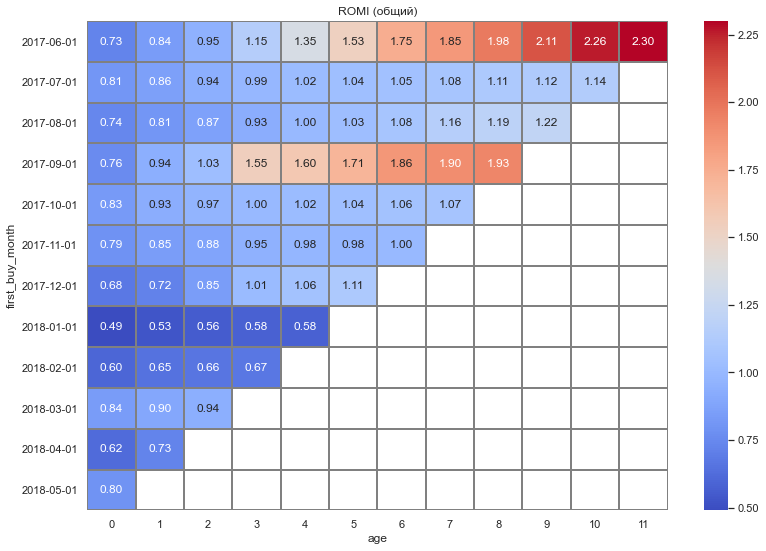

In [142]:
plt.figure(figsize=(13, 9))
plt.title('ROMI (общий)')
sns.heatmap(output_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
plt.show()

In [143]:
# Средний ROMI по месяцам жизни когорт
output_romi.mean(axis=0)

age
0     0.724167
1     0.796364
2     0.865000
3     0.981111
4     1.076250
5     1.205714
6     1.300000
7     1.412000
8     1.552500
9     1.483333
10    1.700000
11    2.300000
dtype: float64

В среднем, окупаться вложения в маркетинг начинают на 5й месяц жизни когорты

In [144]:
# Средний ROMI для всего проекта 
print('Средний ROMI для всего проекта: {:.2f}'.format(output_romi.mean(axis=0).mean()))

Средний ROMI для всего проекта: 1.28


In [145]:
# Количество покупателей по источникам
buyers_source = visits_romi_orders_source.groupby('source_id')['uid'].nunique().reset_index()
buyers_source = buyers_source.sort_values('uid', ascending = False)
buyers_source['%buyers'] = buyers_source['uid']/buyers_source['uid'].sum()
buyers_source.style.format({('%buyers'):'{:.2%}'})

,source_id,uid,%buyers
3,4,9833,26.93%
2,3,9217,25.25%
4,5,6823,18.69%
1,2,4247,11.63%
0,1,3790,10.38%
5,9,1378,3.77%
6,10,1220,3.34%


In [146]:
# Затраты по источникам
costs_source.style.format({('cost_%'):'{:.2%}', ('costs'):'{:.0f}'})

,source_id,costs,cost_%
0,3,141322,42.94%
1,4,61074,18.56%
2,5,51757,15.73%
3,2,42806,13.01%
4,1,20833,6.33%
5,10,5822,1.77%
6,9,5517,1.68%


In [147]:
# ROMI по месяцам по источникам
rezult_romi_groups = rezult_romi.pivot_table(index='buy_month', columns='source_id', values='romi', aggfunc='mean')

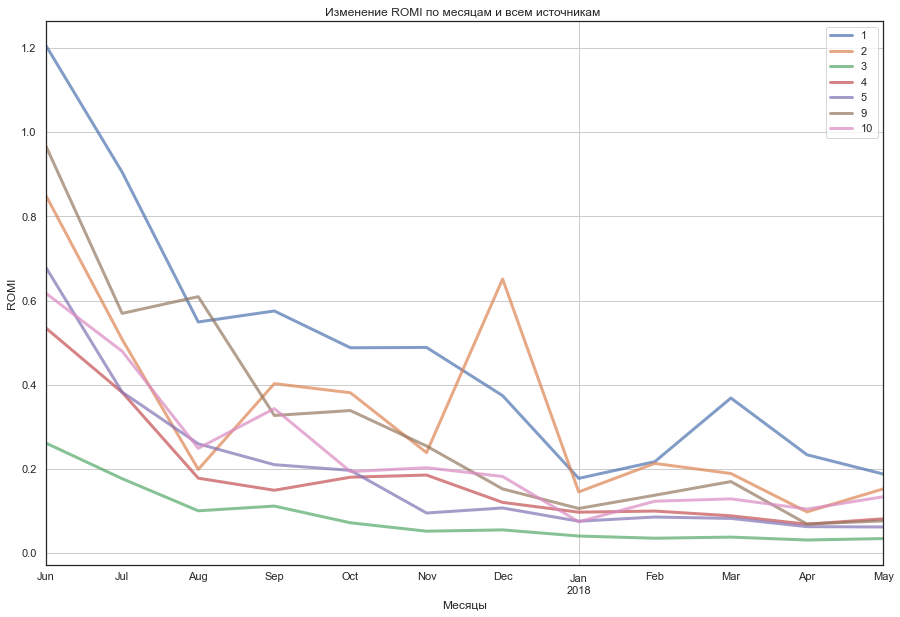

In [148]:
#Построим график
#датасет, название, ось х, ось у
print_plot(rezult_romi_groups, 'Изменение ROMI по месяцам и всем источникам ', 'Месяцы', 'ROMI')

In [149]:
# Средний ROMI по источникам в месяц
rezult_romi_source=rezult_romi.groupby('source_id')['romi'].mean().reset_index()
rezult_romi_source = rezult_romi_source.sort_values(by='romi')
rezult_romi_source

,source_id,romi
2,3,0.053249
4,5,0.114912
3,4,0.122331
6,10,0.157274
5,9,0.194792
1,2,0.254051
0,1,0.343807


Источники 1, 2, 9 имеют самый высокий ROMI, но по всем источникам есть тенденция снижения. Источник 9 предоставляет всего 3,77% покупателей, не так интересен для рассмотрения.
Поскольку ROMI — это отношение прибыль на затраты, то можно сделать вывод, что либо прибыль снижается, либо затраты увеличиваются. Скорее всего, поскольку маркетинговые затраты примерно на одном уровне, как показано ранее, и имеется тенденция к снижению числа посетителей, наблюдаем снижение ROMI. 

Источник 1 показывает самое большое отношение прибыль/затраты по графику. На источник 1 приходится всего около 6% маркетинговых затрат и 10,38% покупателей. Этот источник может быть перспективным.

Источник 2 имеет 11,63% покупателей и высокий ROMI, может быть перспективным. На третьем месте источник 5, у него 18,69% покупателей.

Самые крупные источники по количеству посетителей 4 и 3 (примерно по 26% покупателей)
имеют ROMI достаточно низкие. Источник 3 привлекает самое больше количество маркетинговых затрат - 43%. 

In [150]:
# Функция, строящая сводную таблицу с накопительным ROMI по источнику
def output_r(source):
    print('Сводная таблицу с накопительным ROMI по источнику', source)
    output_romi = rezult_romi.query('source_id == @source').pivot_table(index=['first_buy_month', 'source_id'], columns='age', values = 'romi', aggfunc='mean').cumsum(axis=1).round(2)
    display(output_romi.cumsum(axis=1).round(2).fillna(''))
    return


In [151]:
# Функция, строящая heatmap
def heatmap(source):
    a = rezult_romi.query('source_id == @source').pivot_table(index=['first_buy_month', 'source_id'], columns='age', values = 'romi', aggfunc='mean').cumsum(axis=1)
    plt.figure(figsize=(13, 9))
    plt.title('Cohorts: Romi source')
    sns.heatmap(a.cumsum(axis=1).round(2), annot=True, fmt='.1f', cmap= 'coolwarm')
    plt.show()

Рассмотрим сводные таблицы по источникам: 1, 2, 3, 4, 5, 9 и 10.

In [152]:
output_r(1)

Сводная таблицу с накопительным ROMI по источнику 1


,age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,source_id,,,,,,,,,,,,
2017-06-01,1,1.21,2.84,4.86,7.6,11.04,15.33,20.6,26.15,32.09,38.6,45.83,53.22
2017-07-01,1,1.38,2.89,4.56,6.27,7.98,9.74,11.51,13.31,15.14,16.98,18.87,
2017-08-01,1,1.14,2.38,3.68,5.08,6.58,8.12,9.75,11.64,13.58,15.56,,
2017-09-01,1,1.32,3.22,5.41,7.85,10.43,13.21,16.82,20.66,24.63,,,
2017-10-01,1,1.06,2.36,3.71,5.11,6.54,8.01,9.52,11.05,,,,
2017-11-01,1,1.43,3.1,4.91,7.07,9.37,11.69,14.03,,,,,
2017-12-01,1,0.96,2.03,3.16,4.34,5.54,6.77,,,,,,
2018-01-01,1,0.64,1.31,2.01,2.73,3.46,,,,,,,
2018-02-01,1,0.78,1.73,2.7,3.74,,,,,,,,


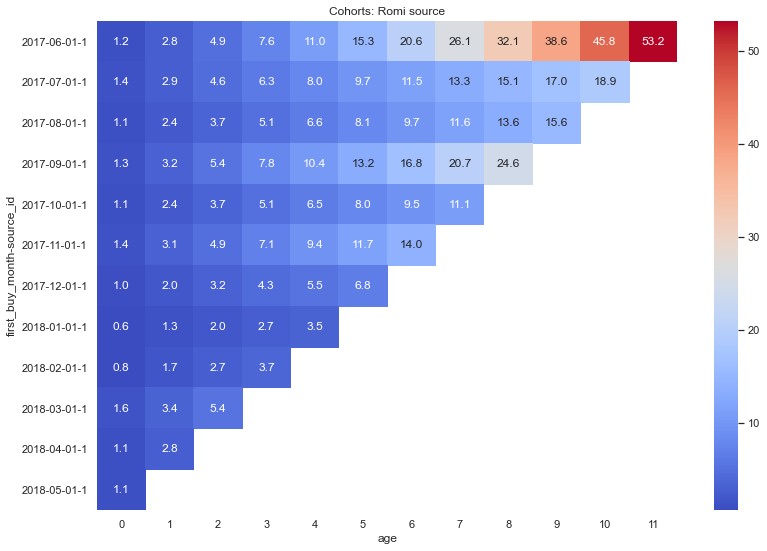

In [153]:
heatmap(1)

In [154]:
output_r(2)

Сводная таблицу с накопительным ROMI по источнику 2


,age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,source_id,,,,,,,,,,,,
2017-06-01,2,0.85,1.84,2.94,4.42,6.3,8.34,10.64,13.24,16.04,19.01,22.08,25.26
2017-07-01,2,0.87,1.76,2.75,3.83,4.96,6.11,7.28,8.46,9.65,10.86,12.1,
2017-08-01,2,0.47,1.12,1.9,2.81,3.94,5.18,6.49,7.87,9.3,10.78,,
2017-09-01,2,0.95,2.41,4.07,8.96,14.04,19.53,25.13,30.77,36.44,,,
2017-10-01,2,0.79,1.79,2.84,3.94,5.07,6.23,7.4,8.59,,,,
2017-11-01,2,0.66,1.37,2.1,2.85,3.61,4.39,5.17,,,,,
2017-12-01,2,0.74,1.58,3.15,5.59,8.26,11.17,,,,,,
2018-01-01,2,0.37,0.78,1.23,1.7,2.19,,,,,,,
2018-02-01,2,0.39,0.82,1.28,1.76,,,,,,,,


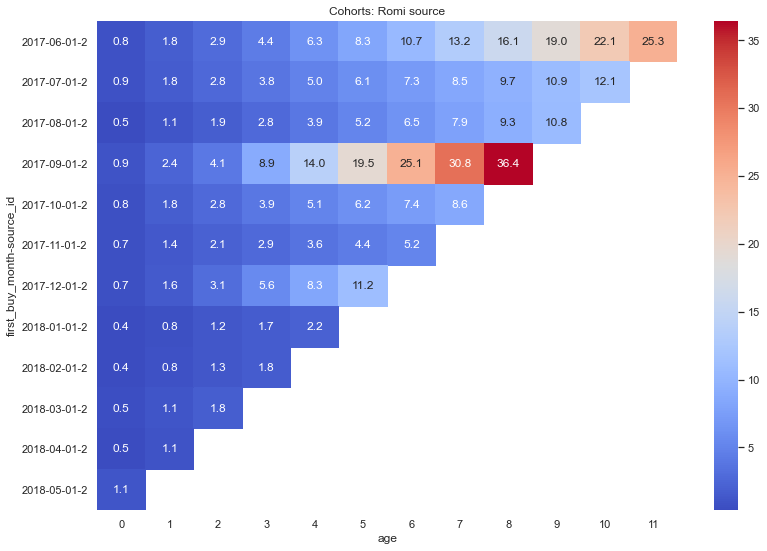

In [155]:
heatmap(2)

In [156]:
output_r(3)

Сводная таблицу с накопительным ROMI по источнику 3


,age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,source_id,,,,,,,,,,,,
2017-06-01,3,0.26,0.53,0.8,1.08,1.38,1.68,1.98,2.28,2.59,2.9,3.21,3.53
2017-07-01,3,0.35,0.73,1.19,1.69,2.19,2.71,3.24,3.79,4.35,4.93,5.52,
2017-08-01,3,0.26,0.53,0.83,1.14,1.46,1.79,2.12,2.47,2.85,3.24,,
2017-09-01,3,0.34,0.69,1.05,1.42,1.8,2.19,2.59,3.0,3.42,,,
2017-10-01,3,0.27,0.56,0.85,1.14,1.44,1.74,2.05,2.36,,,,
2017-11-01,3,0.27,0.56,0.86,1.17,1.48,1.79,2.12,,,,,
2017-12-01,3,0.31,0.62,0.94,1.27,1.6,1.93,,,,,,
2018-01-01,3,0.27,0.54,0.82,1.12,1.42,,,,,,,
2018-02-01,3,0.26,0.54,0.83,1.12,,,,,,,,


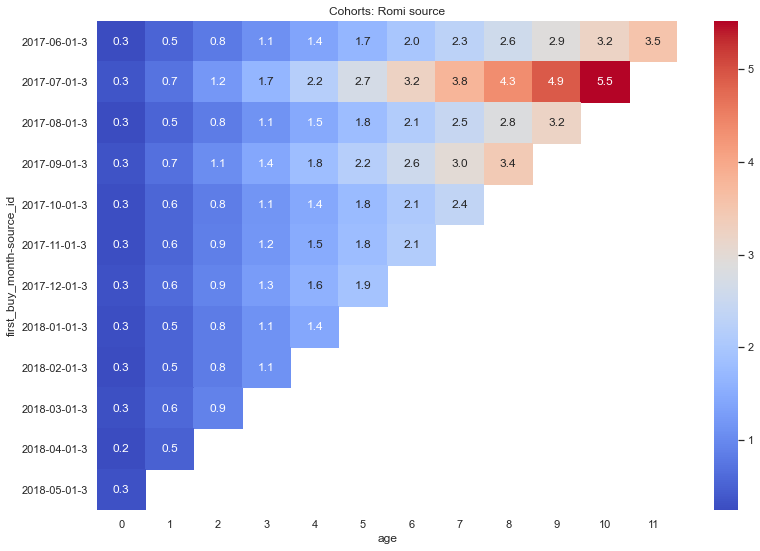

In [157]:
heatmap(3)

In [158]:
output_r(4)

Сводная таблицу с накопительным ROMI по источнику 4


,age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,source_id,,,,,,,,,,,,
2017-06-01,4,0.53,1.08,1.64,2.21,2.8,3.4,4.02,4.65,5.29,5.94,6.6,7.26
2017-07-01,4,0.75,1.51,2.3,3.11,3.95,4.8,5.66,6.53,7.44,8.37,9.31,
2017-08-01,4,0.51,1.04,1.58,2.15,2.74,3.35,3.97,4.6,5.23,5.87,,
2017-09-01,4,0.54,1.1,1.68,2.27,2.89,3.52,4.16,4.8,5.44,,,
2017-10-01,4,0.81,1.66,2.54,3.44,4.37,5.32,6.28,7.25,,,,
2017-11-01,4,0.99,2.04,3.11,4.19,5.3,6.41,7.53,,,,,
2017-12-01,4,0.70,1.41,2.14,2.89,3.64,4.4,,,,,,
2018-01-01,4,0.65,1.32,2.0,2.69,3.38,,,,,,,
2018-02-01,4,0.77,1.56,2.35,3.15,,,,,,,,


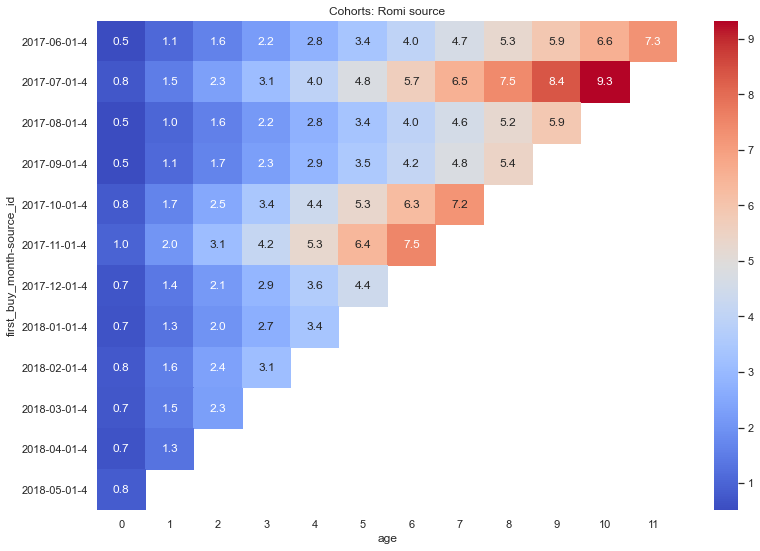

In [159]:
heatmap(4)

In [160]:
output_r(5)

Сводная таблицу с накопительным ROMI по источнику 5


,age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,source_id,,,,,,,,,,,,
2017-06-01,5,0.68,1.37,2.09,2.83,3.63,4.45,5.31,6.2,7.13,8.1,9.09,10.08
2017-07-01,5,0.75,1.55,2.35,3.18,4.03,4.88,5.73,6.59,7.46,8.33,9.21,
2017-08-01,5,0.70,1.43,2.21,3.0,3.82,4.66,5.5,6.34,7.19,8.05,,
2017-09-01,5,0.78,1.6,2.44,3.3,4.17,5.04,5.93,6.82,7.72,,,
2017-10-01,5,0.81,1.65,2.51,3.4,4.31,5.24,6.19,7.17,,,,
2017-11-01,5,0.47,0.95,1.44,1.94,2.44,2.95,3.47,,,,,
2017-12-01,5,0.62,1.26,1.91,2.56,3.24,3.93,,,,,,
2018-01-01,5,0.49,1.09,1.8,2.52,3.25,,,,,,,
2018-02-01,5,0.56,1.13,1.7,2.27,,,,,,,,


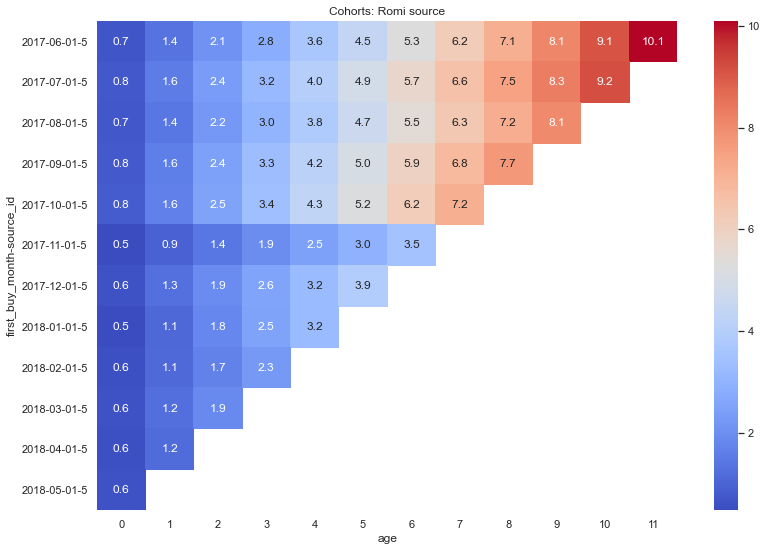

In [161]:
heatmap(5)

In [162]:
output_r(9)

Сводная таблицу с накопительным ROMI по источнику 9


,age,0,1,2,3,4,5,6,7,8,9,10
first_buy_month,source_id,,,,,,,,,,,
2017-06-01,9,0.97,1.98,3.12,4.29,5.5,6.73,7.98,9.23,10.59,11.96,13.35
2017-07-01,9,1.10,2.29,3.61,5.01,6.49,7.98,9.53,11.13,12.83,14.55,16.28
2017-08-01,9,1.61,3.33,5.16,7.05,8.98,10.93,12.98,15.19,17.45,19.75,
2017-09-01,9,1.03,2.18,3.43,4.71,6.01,7.33,8.69,10.05,11.42,,
2017-10-01,9,1.34,2.81,4.34,5.9,7.5,9.13,10.78,12.44,,,
2017-11-01,9,1.13,2.28,3.46,4.69,5.94,7.19,8.47,,,,
2017-12-01,9,0.90,1.87,2.88,3.94,5.04,6.15,,,,,
2018-01-01,9,0.61,1.27,1.96,2.66,3.36,,,,,,
2018-02-01,9,0.78,1.61,2.45,,,,,,,,


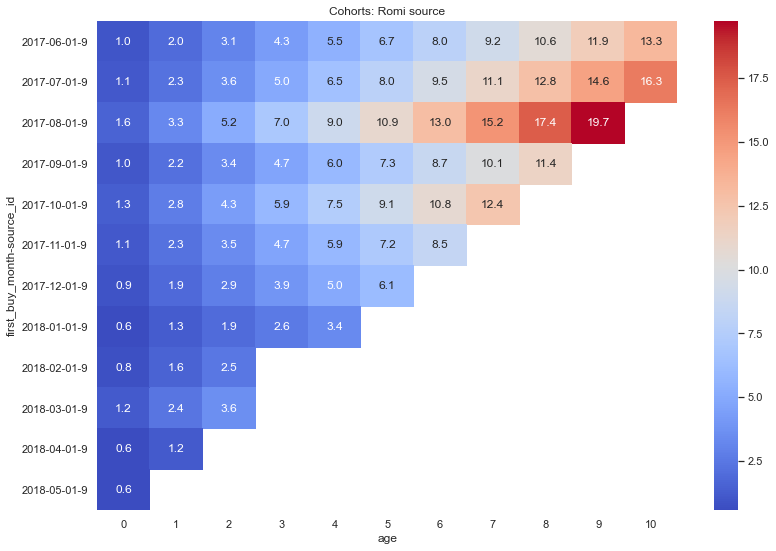

In [163]:
heatmap(9)

In [164]:
output_r(10)

Сводная таблицу с накопительным ROMI по источнику 10


,age,0,1,2,3,4,5,6,7,8,11
first_buy_month,source_id,,,,,,,,,,
2017-06-01,10,0.62,,,,,,,,,1.24
2017-07-01,10,0.48,0.96,,1.45,,,1.96,2.5,3.05,
2017-08-01,10,0.49,,0.99,,,,,1.51,,
2017-09-01,10,0.34,0.69,1.05,1.44,1.83,,2.23,2.63,,
2017-10-01,10,0.75,1.54,,2.33,3.13,3.94,4.76,5.58,,
2017-11-01,10,0.56,1.13,1.7,2.29,2.89,3.49,4.1,,,
2017-12-01,10,0.51,1.04,1.58,,2.12,2.66,,,,
2018-01-01,10,0.41,0.82,1.24,,,,,,,
2018-02-01,10,0.66,1.35,2.04,2.73,,,,,,


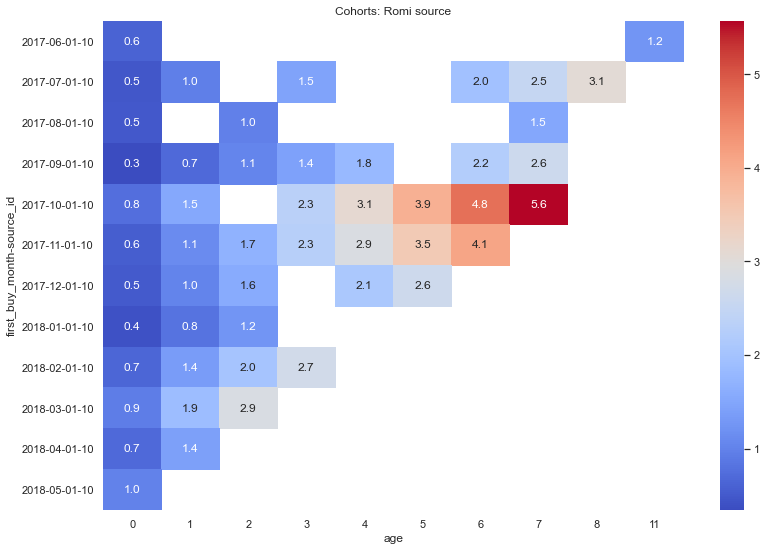

In [165]:
heatmap(10)

#### Вывод 

Источник 1 показывает по первой когорте наибольший накопительный ROMI среди всех на конец года по старшей когорте - 53,2. Если разобраться в причинах снижения ROMI по нему, источник 1 может быть перспективен. Небольшой общий процент - 6,33% затрат и 10,38% покупателей. Затраты на привлечение одного пользователя по нему 3,81 уе. Уже с первого месяца большинство когорт окупаются. 

По источнику 2 более перспективна когорта 2017-09-01 (на 9й месяц жизни когорты накопительный ROMI - 36,4). Затраты на источник 2 - 6,49 уе/мес. Второй источник привлек 11,63% покупателей. Окупаться начинает с 2 месяца жизни когорт.

Крупный источник 3 (25,25% привлеченных покупателей) окупаться начинает только с 4 месяца. Затраты на привлечение одного покупателя в среднем по нему - 10,8 уе/мес. Самая перспективная когорта 2017-07-01. ROMI самый низкий среди крупных источников.

По источнику 4 более перспективна когорта та же (на 9й месяц жизни когорты накопительный ROMI - 9,3). Затраты на источник 4 - 6,47 уе/мес. Источник привлек 26,93% покупателей, самый крупный. Окупаться начинает с 2 месяца жизни когорт.

По источнику 5 когорты достаточно равномерно показывают динамику увеличения ROMI. Затраты на источник 5 - 6,47 уе/мес. 5 источник привлек 18,69% покупателей. Окупаться начинает с 2 месяца жизни когорт.

Источник 9 имеет хорошие показатели ROMI, окупаться начинает со второго месяца жизни когорт, но привлекает всего 3,77% покупателей.

Источник 10 медленно окупается и привлекает небольшое число посетителей - 3,34%

## Вывод 

Данные были обработаны и объединены.

Расчитано среднее количество уникальных пользователей в день (DAU) - 907, количество уникальных пользователей в неделю (WAU) - 5621, количество уникальных пользователей в месяц (MAU) - 23225. 
Количество новых пользователей уверенно росло до ноября 2017, а после стало снижаться, и такая тенденция сохранилась до конца рассматриваемого периода.

Количество уникальных посетителей в день с desktop более чем в 2 раза выше, чем с touch.

В среднем, количество визитов пользователя в день - 1.09 и этот показатель существенно не меняется с течением времени. В выходные сайт посещают гораздо реже.

ASL: чаще всего встречается продолжительность сессии = 60 секунд, и при использовании desktop, и при использовании touch.

Для расчета Retention Rate применялся когортный анализ. Когорты формировалиь по месяцам. 

Retention Rate: средний RR на второй месяц — 6.52%. на третий — 4.63% и далее снижается. Коэффициент удержания падает с каждой новой когортой.

Большинство посетителей первую покупку делают в тот же день, когда приходят на сайт впервые. Процент пользователей, которые совершали покупки — 17.6%. В среднем, число покупок за 6 месяцев на одного покупателя — 11 шт.
Средний чек — 5 уе.

LTV: Была расчитана метрика LTV для когорт старше 6 месяцев и показана ее динамика. Cредний LTV по когортам на 6й месяц — 8,03 уе, метрика показывает равномерный рост.

CAC: Всего на маркетинг потрачено 329131 уе, привлечение одного покупателя в среднем обошлось компании в 9,2 уе. 

ROMI: По всем источникам наблюдаем снижение ROMI с течением времени. 
Самая перспективная когорта - первая 2017-06-01, в ней хорошие показатели ROMI по всем источникам и наибольший накопленный LTV.  Хорошие показатель ROMI у когорты 2017-09-01.

Перспективные источники трафика:

Источники 1, 2, 5 имеют самый высокий ROMI, но по всем источникам есть тенденция его снижения.
Источники представлены в порядке убывания среднего ROMI в месяц.

Источник 1 (10,38% покупателей) показывает наибольший ROMI среди всех — 53,2 по старшей когорте к концу периода. Но есть тенденция к снижению с течением времени. Необходимо разобраться в причинах снижения ROMI, источник 1 может быть перспективен. С первого месяца окупаются все когорты.

Источник 2 (11,63% покупателей) окупаться начинает со второго месяца, перспективен.

Источник 4 (26,93% покупателей, самый крупный) окупаться начинает со второго месяца, перспективен.

Источник 5 (18,69% покупателей) крупнее источника 1 и 2, окупаться начинает со второго месяца, перспективен. Показывает равномерную динамику по всем когортам.

Затраты по вышеперечисленным источникам окупаются уже в первый месяц жизни когорты.

Остальные источники менее привлекательны. Источник 3 привлекает почти 50% финансирования, но окупаться начинает только с 4 месяца. Поток клиентов - примерно 25%. Источник 9 и 10 каждый менее 4% потока покупателей; 

##### Итог:

LTV показывает равномерную тенденцию роста. На конец рассматриваемого периода затраты на привлечение покупателей из всех когорт окупились.

По результату проведенного анализа рекомендовано перенаправить маркетинговый бюджет из 3 на другие источники трафика и рассмотреть возможность увеличить бюджета по источникам 1, 2, 4, 5. Источники траффика 6, 7, 9, 10 не так выгодны. В среднем, окупаться вложения в маркетинг начинают на 5й месяц жизни когорты. Самая перспективная когорта - самая старшая. 

Стоит учесть периодичность посещения сайта по дням недели, в выходные сайт посещают реже. Чаще сайт посещают с desktop.

С каждой новой когортой коэффициент удержания падает, как и количество новых посетителей. Длительность сессии показывает, что чаще всего пользователи уходят с сайта довольно быстро, не заинтересовавшись и не сделав покупку. Многие посетители (84%) покупок не совершают

Количество отказов составляет 10%, рекомендовано проверить, нет ли технических ошибок и проанализировать качество UX-UI дизайна сайта.
